# Introduction

Members:

- Ardiansyah Putra Mahadika

- Divani Rafitya Amanda

- Salman Hamka De Qais

Batch : BSD - 006

## Background

In these days, people have many investment options like stocks, bonds, mutual funds, and cryptocurrencies. With so many choices, it can be confusing to decide where to invest. This confusion can lead to poor investment decisions that don't meet long-term financial goals. That's why a personal finance recommendation system is important. It can help by giving personalized advice based on a person's financial data, risk tolerance, and goals, making it easier to make smart and informed investment choices.

## Objective

__1. Understanding the Investment Behavior of Respondents (Young Millennials) Using the 5W1H Approach__


- Who: Identify who the respondents are (young millennials).
- What: Understand what types of investments they prefer.
- When: Determine when they are most likely to invest.
- Where: Identify the geographical locations or platforms they prefer for investments.
- Why: Understand the reasons behind their investment choices.
- How: Examine how they make investment decisions and the factors influencing these decisions.


__2. Exploratory Data Analysis (EDA)__

*Before Clustering:*

- Demographic Analysis: Analyze the demographic distribution of the respondents (age, gender, income, etc.)

- Investment Preferences: Examine the types of investments preferred by the respondents

- Risk Tolerance: Analyze the risk tolerance levels of the respondents

*After Clustering:*

- Cluster Characteristics: Analyze the characteristics of each cluster (demographics, investment preferences, risk tolerance)

- Risk Profiles: Examine the risk profiles of each cluster

- Investment Behavior: Analyze the investment behaviors of each cluster


__3. Identifying Respondent Groupings Based on Characteristics and Risk Profiles__

- Principal Component Analysis (PCA): Use PCA to reduce dimensionality while retaining important information.

- Elbow Method: Use the Elbow Method to determine the optimal number of clusters.

- Silhouette Score and Silhouette Plot: Use the Silhouette Score and Silhouette Plot to validate the optimal number of clusters.


__4. Creating a Machine Learning Model for Investment Product Recommendations__

- Artificial Neural Network (ANN): Develop an ANN model to provide investment product recommendations according to the risk profile of each cluster/group.

- Natural Language Processing (NLP): Use NLP to analyze text data and generate the best investment recommendations based on the analyzed data.

# Import Required Libraries

In [1]:
# Data loading libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering and Text Preprocessing Libraries
import phik
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS


# Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, LSTM, Bidirectional, Dropout, Reshape
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping

# Downloading NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# import warnings
import warnings
warnings.filterwarnings('ignore')

2024-07-29 03:05:40.567709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ardiansyahputra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ardiansyahputra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Loading

In [60]:
df = pd.read_csv('survey_cleaned_data.csv')
df.head()

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
0,0,0,0,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,3,3,3
1,1,1,0,2,2,4,3,3,3,3,...,4,2,3,2,3,4,3,2,2,3
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,0,2,1,3,2,3,3,4,...,3,2,2,1,1,2,3,3,2,3
4,0,0,1,2,2,3,2,3,2,5,...,2,1,1,2,2,1,1,2,1,3


In [8]:
df.columns

Index(['gender', 'age', 'allowance', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7',
       'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17',
       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27',
       'q28', 'q29', 'q30'],
      dtype='object')

## Data Explanation

| Column | Description | Datatype | Is Correct Datatype |
| :---------------------: | :---------------------------------: | :----------------------------: | :------------: |
| gender | .... | int64 | Yes | 
| age | .... | int64 | Yes | 
| allowance | .... | int64 | Yes | 
| q1 | .... | int64 | Yes | 
| q2 | .... | int64 | Yes | 
| q3 | .... | int64 | Yes | 
| q4 | .... | int64 | Yes | 
| q5 | .... | int64 | Yes | 
| q6 | .... | int64 | Yes | 
| q7 | .... | int64 | Yes | 
| q8 | .... | int64 | Yes | 
| q9 | .... | int64 | Yes | 
| q10 | .... | int64 | Yes | 
| q11 | .... | int64 | Yes | 
| q12 | .... | int64 | Yes | 
| q13 | .... | int64 | Yes | 
| q14 | .... | int64 | Yes | 
| q15 | .... | int64 | Yes | 
| q16 | .... | int64 | Yes | 
| q16 | .... | int64 | Yes | 
| q17 | .... | int64 | Yes | 
| q18 | .... | int64 | Yes | 
| q19 | .... | int64 | Yes | 
| q20 | .... | int64 | Yes | 
| q21 | .... | int64 | Yes | 
| q22 | .... | int64 | Yes | 
| q23 | .... | int64 | Yes | 
| q24 | .... | int64 | Yes | 
| q25 | .... | int64 | Yes | 
| q26 | .... | int64 | Yes | 
| q27 | .... | int64 | Yes | 
| q28 | .... | int64 | Yes | 
| q29 | .... | int64 | Yes | 
| q30 | .... | int64 | Yes | 


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   gender     263 non-null    int64
 1   age        263 non-null    int64
 2   allowance  263 non-null    int64
 3   q1         263 non-null    int64
 4   q2         263 non-null    int64
 5   q3         263 non-null    int64
 6   q4         263 non-null    int64
 7   q5         263 non-null    int64
 8   q6         263 non-null    int64
 9   q7         263 non-null    int64
 10  q8         263 non-null    int64
 11  q9         263 non-null    int64
 12  q10        263 non-null    int64
 13  q11        263 non-null    int64
 14  q12        263 non-null    int64
 15  q13        263 non-null    int64
 16  q14        263 non-null    int64
 17  q15        263 non-null    int64
 18  q16        263 non-null    int64
 19  q17        263 non-null    int64
 20  q18        263 non-null    int64
 21  q19        263 n

# Exploratory Data Analysis

## PLOT 1 - Number of Allowance

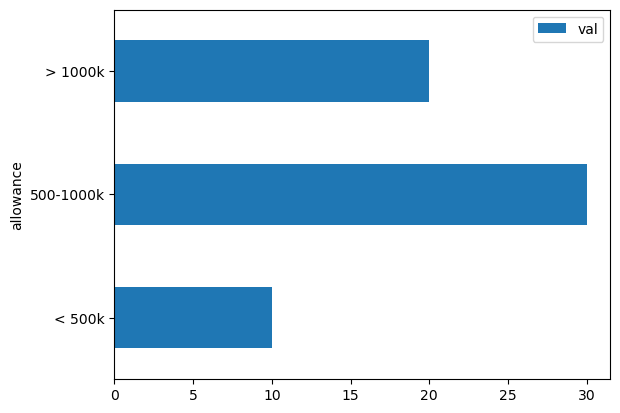

In [10]:
#barplot allowance
df_group_1 = pd.DataFrame({'allowance':['< 500k', '500-1000k', '> 1000k'], 'val':[10, 30, 20]})
ax = df_group_1.plot.barh(x='allowance', y='val', rot=0)

## Penjelasan plot 1

1. Memahami Grafik

Grafik batang horizontal di atas memberikan gambaran visual mengenai distribusi besaran uang saku. Sumbu Y menunjukkan tiga kategori besaran uang saku:

- < 500k: Uang saku di bawah 500 ribu rupiah.
- 500-1000k: Uang saku antara 500 ribu hingga 1 juta rupiah.
- .> 1000k: Uang saku di atas 1 juta rupiah.

    Sumbu X menunjukkan frekuensi atau jumlah individu yang masuk dalam setiap kategori tersebut. Panjang batang pada setiap kategori merepresentasikan proporsi individu yang mendapatkan besaran uang saku tertentu.

2. Interpretasi Data

Berdasarkan grafik, dapat kita tarik beberapa kesimpulan:

- Dominasi Kategori Menengah: Sebagian besar individu yang disurvei memiliki uang saku dalam rentang 500 ribu hingga 1 juta rupiah. Batang pada kategori ini paling panjang, menunjukkan frekuensi tertinggi.

- Jumlah yang Mendapat Uang Saku Tinggi Relatif Sedikit: Meskipun ada kelompok yang mendapatkan uang saku di atas 1 juta rupiah, jumlahnya relatif lebih sedikit dibandingkan dengan dua kategori lainnya.

- Uang Saku di Bawah 500 Ribu: Kategori ini memiliki frekuensi yang lebih rendah dibandingkan dua kategori lainnya, mengindikasikan bahwa jumlah individu yang mendapatkan uang saku di bawah 500 ribu rupiah adalah yang paling sedikit.

___

## PLOT 2 - Number of Age

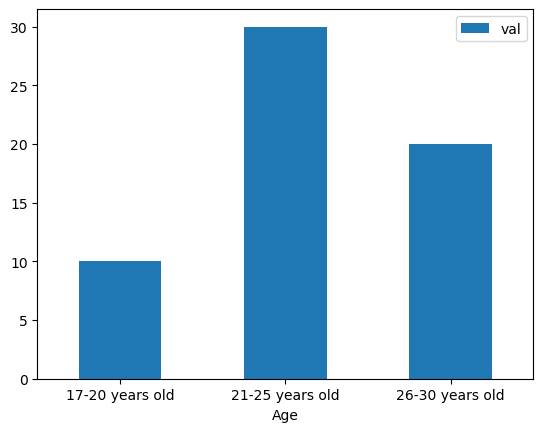

In [11]:
#barplot Age
df_group_2 = pd.DataFrame({'Age':['17-20 years old', '21-25 years old', '26-30 years old'], 'val':[10, 30, 20]})
ax = df_group_2.plot.bar(x='Age', y='val', rot=0)

### Penjelasan PLOT 2
1. Kesimpulan Utama

- Peningkatan Nilai Signifikan pada Kelompok Usia 21-25 Tahun: Kelompok usia ini memiliki nilai rata-rata yang jauh lebih tinggi dibandingkan dua kelompok usia lainnya. Ini mengindikasikan adanya faktor atau kondisi tertentu yang membuat kelompok usia ini memperoleh hasil yang lebih baik.

- Penurunan Nilai pada Kelompok Usia 26-30 Tahun: Setelah mencapai puncak pada kelompok usia 21-25 tahun, nilai rata-rata mengalami penurunan pada kelompok usia 26-30 tahun. Ini bisa mengindikasikan adanya beberapa faktor seperti perubahan prioritas, tuntutan pekerjaan, atau faktor lainnya yang mempengaruhi kinerja atau pencapaian pada kelompok usia ini.

- Perbedaan yang Cukup Signifikan Antar Kelompok Usia: Grafik menunjukkan adanya perbedaan yang cukup mencolok antara nilai rata-rata dari ketiga kelompok usia. Ini mengindikasikan bahwa usia merupakan faktor yang cukup signifikan dalam mempengaruhi nilai atau variabel yang diukur.
___

## PLOT 3 - Distribution Number of Gender in Dataset

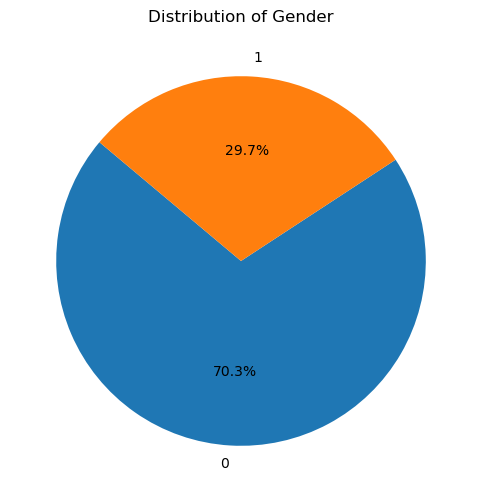

In [12]:
# Pie Chart
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()

### Penjelasan plot 3:
- Kesimpulan:

Berdasarkan analisis data yang telah dilakukan, ditemukan adanya ketidakseimbangan gender yang signifikan dalam sampel penelitian, dengan dominasi populasi laki-laki. Persentase laki-laki yang jauh lebih tinggi dibandingkan perempuan mengindikasikan adanya bias gender dalam data atau populasi yang diteliti. Temuan ini perlu dikaji lebih lanjut untuk mengidentifikasi penyebab ketidakseimbangan tersebut dan implikasinya terhadap hasil penelitian.

- Insight:

Ketidakseimbangan gender dalam penelitian ini menyoroti pentingnya memperhatikan representasi gender dalam pengumpulan dan analisis data. Adanya bias gender dapat membatasi generalisasi hasil penelitian dan mengabaikan pengalaman serta perspektif kelompok minoritas. Oleh karena itu, dalam penelitian selanjutnya perlu dilakukan upaya untuk memastikan representasi gender yang lebih seimbang, serta mempertimbangkan faktor-faktor sosial dan budaya yang dapat mempengaruhi partisipasi perempuan dalam penelitian.

## PLOT 4 - Q3 dan Gender

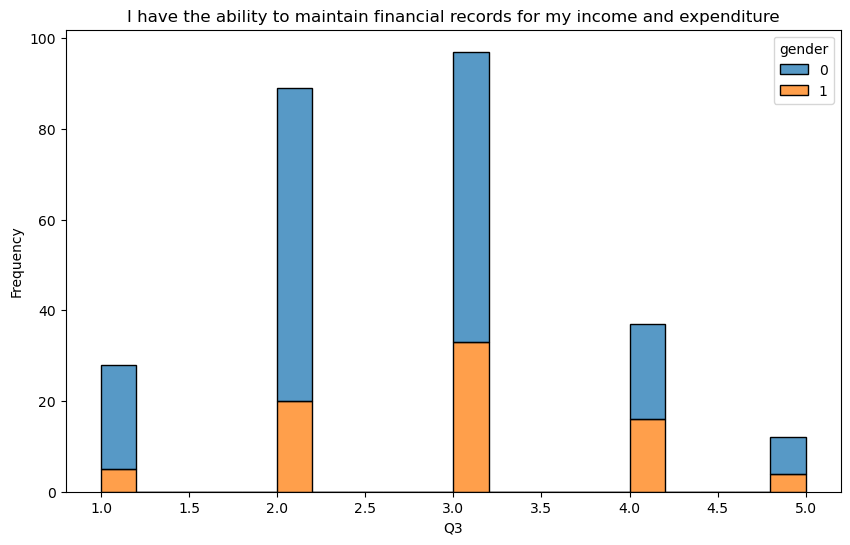

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='q3', hue='gender', multiple='stack', bins=20)
plt.title('I have the ability to maintain financial records for my income and expenditure')
plt.xlabel('Q3')
plt.ylabel('Frequency')
plt.show()

### Penjelasan plot 4
___

1. Insight Berdasarkan Gender:

- Perempuan (Female) lebih dominan pada semua skala respons, terutama pada skala 2 dan 3. Ini menunjukkan bahwa banyak perempuan yang merasa tidak yakin atau netral terhadap kemampuan mereka dalam membuat catatan keuangan.
- Laki-laki (Male) lebih sedikit secara keseluruhan, tetapi mereka lebih terdistribusi pada skala yang lebih tinggi (3 dan 4), menunjukkan bahwa laki-laki cenderung lebih percaya diri dalam kemampuan mereka membuat catatan keuangan dibandingkan perempuan.

2. Kesimpulan:
- Kebanyakan perempuan cenderung merasa kurang yakin atau netral terhadap kemampuan mereka dalam membuat catatan keuangan atas pemasukan dan pengeluaran mereka. Hal ini mungkin menunjukkan adanya kebutuhan untuk meningkatkan literasi keuangan dan kepercayaan diri di kalangan perempuan.
- Laki-laki cenderung lebih percaya diri dalam kemampuan mereka, meskipun jumlah mereka lebih sedikit dalam data ini.
- Intervensi dan Program Edukasi: Dibutuhkan program edukasi dan intervensi yang lebih difokuskan pada perempuan untuk meningkatkan literasi keuangan mereka dan membantu mereka merasa lebih yakin dalam kemampuan mereka mengelola keuangan.

## PLOT 5 - Allowance dan Q6

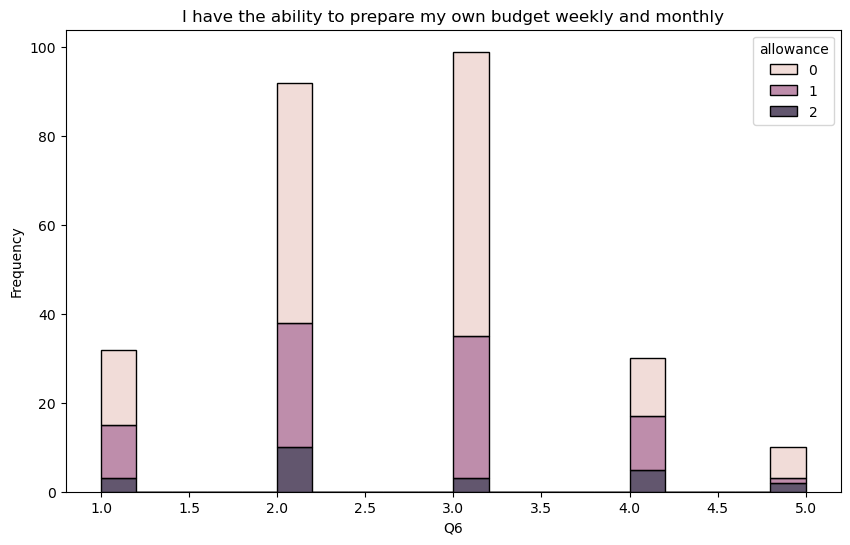

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='q6', hue='allowance', multiple='stack', bins=20)
plt.title('I have the ability to prepare my own budget weekly and monthly')
plt.xlabel('Q6')
plt.ylabel('Frequency')
plt.show()

### Penjelasan PLOT 5
___
1. Penjelasan Plot:
- Sumbu X (Q3): Sumbu ini mewakili respons terhadap pernyataan tersebut, kemungkinan pada skala Likert (misalnya, 1 hingga 5), dengan 1 menunjukkan sangat tidak setuju dan 5 menunjukkan sangat setuju.
- Sumbu Y (Frekuensi): Sumbu ini menunjukkan jumlah respons.
- Hue (Allowance): Respons dibedakan berdasarkan uang saku, dengan warna yang berbeda:
0: <500k (warna coklat muda)
1: 500-1000k (warna ungu muda)
2: >1000k (warna ungu tua)
- Batang Tumpuk: Setiap batang mewakili jumlah total respons untuk setiap tingkat Q3, dengan batang dibagi berdasarkan allowance.


2. Kesimpulan dan Insight:

-  Distribusi Keseluruhan
Sebagian besar respons berada di angka 2 dan 3, menunjukkan bahwa mayoritas responden cenderung netral atau sedikit setuju bahwa mereka memiliki kemampuan untuk menyiapkan anggaran sendiri mingguan dan bulanan.


- Allowance <500k (0):

    Dominasi respons di skala 2 dan 3, tetapi juga ada cukup banyak respons di skala 4 dan 1.
Tampaknya, mereka dengan allowance lebih kecil (<500k) lebih mungkin memiliki persepsi kemampuan menyiapkan anggaran yang bervariasi, namun sebagian besar cenderung netral.
Allowance 500-1000k (1):

    Respons tersebar di skala 2, 3, dan 4, dengan jumlah yang hampir sama di setiap kategori ini.
Menunjukkan bahwa mereka dengan allowance menengah (500-1000k) memiliki persepsi yang lebih merata tentang kemampuan mereka dalam menyiapkan anggaran.

- Allowance >1000k (2):

    Lebih sedikit respons di skala 2 dan 3, tetapi ada kehadiran di setiap skala, termasuk skala 5.
Mengindikasikan bahwa mereka dengan allowance lebih besar (>1000k) cenderung lebih yakin dengan kemampuan mereka, namun ada juga yang tidak setuju.

3. Insight:
Secara keseluruhan, tampaknya persepsi kemampuan menyiapkan anggaran cenderung meningkat dengan meningkatnya allowance. Responden dengan allowance lebih besar menunjukkan kepercayaan diri yang lebih tinggi dalam kemampuan mereka.

## PLOT 6

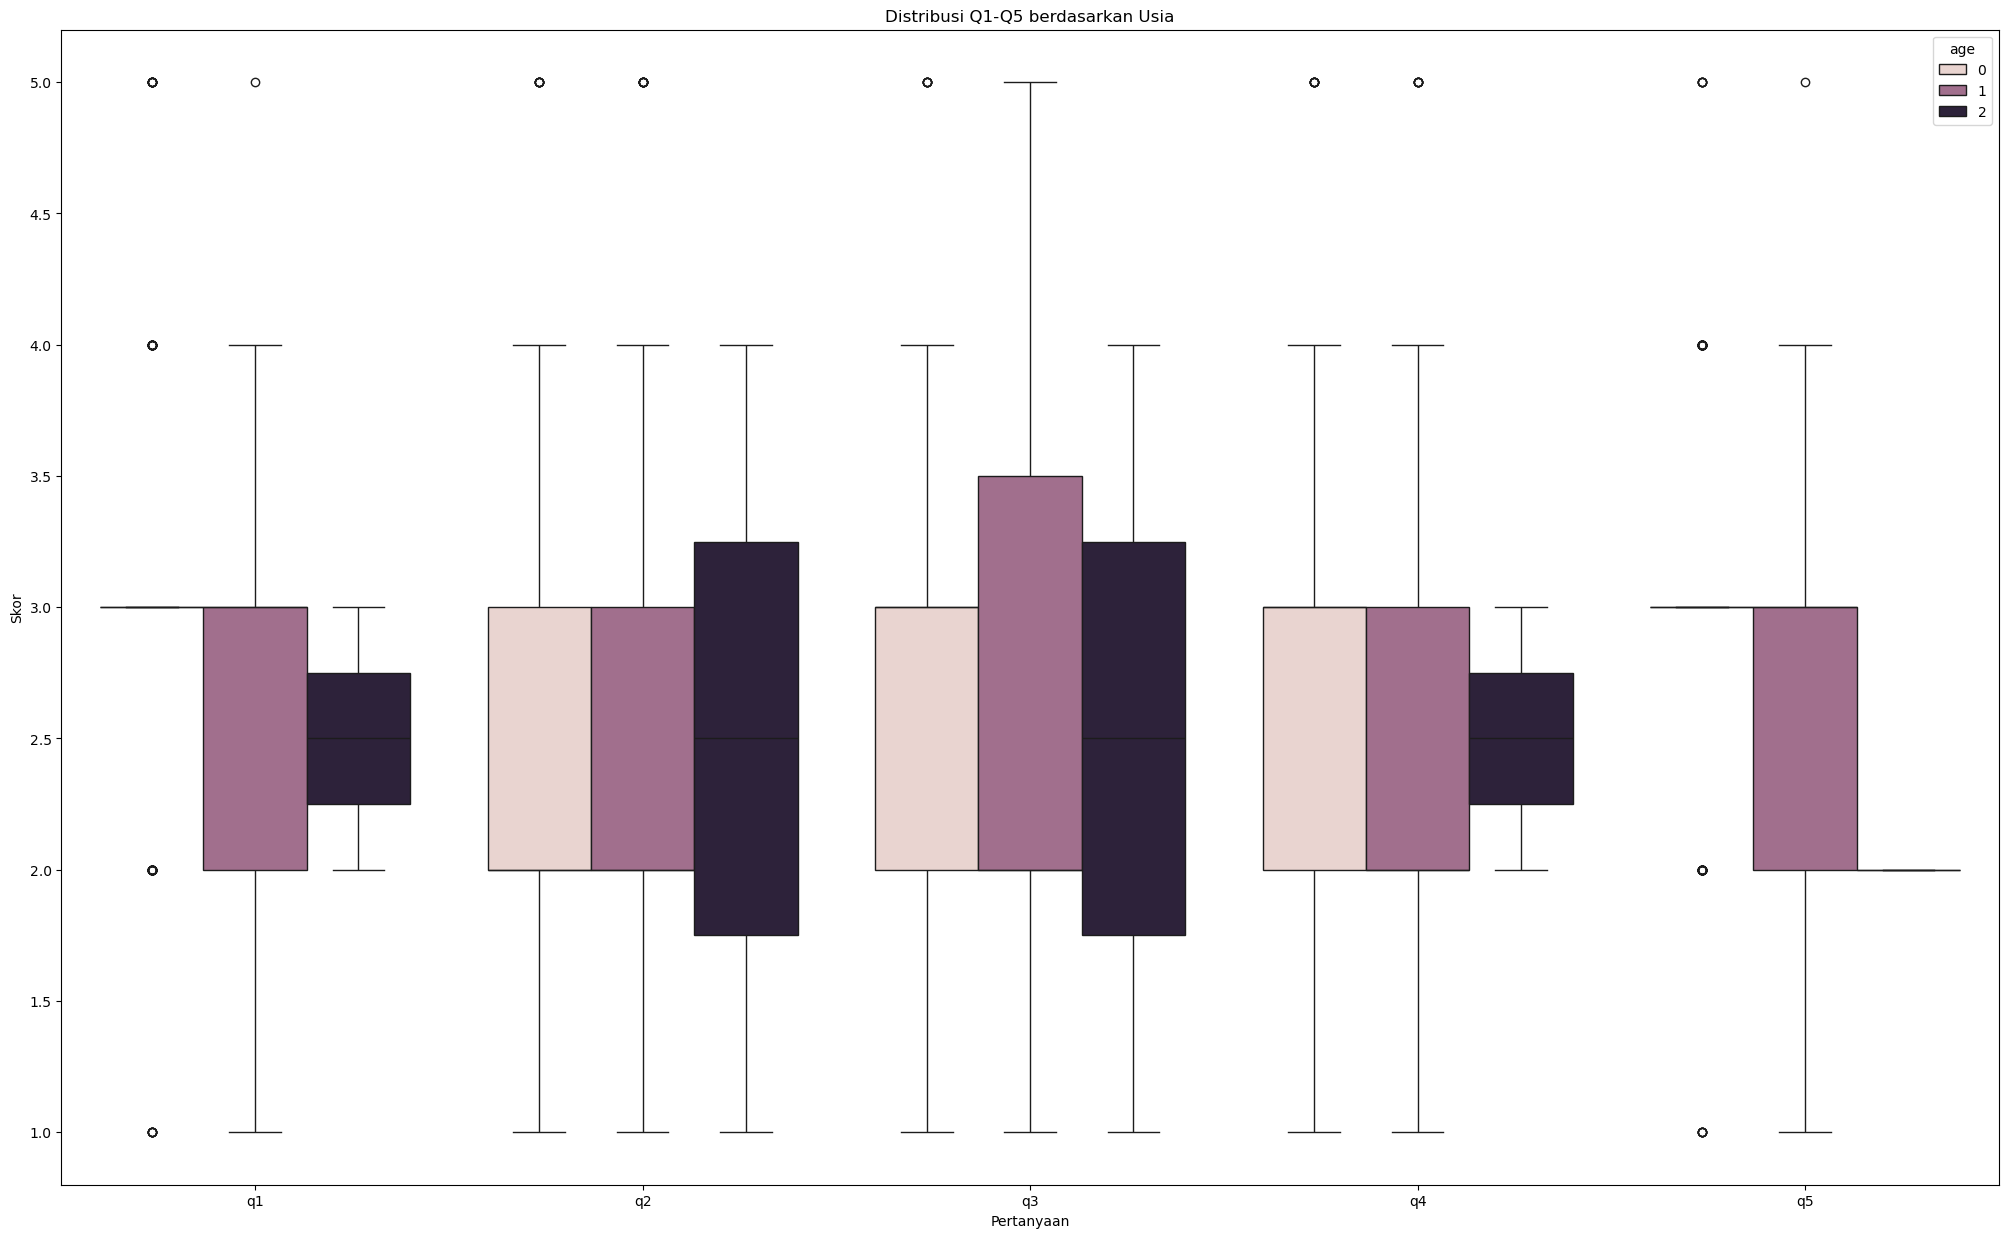

In [17]:
plt.figure(figsize=(25, 15))
df_melted = df.melt(id_vars=['age'], value_vars=[f'q{i}' for i in range(1, 6)], var_name='Questions', value_name='Scores')
sns.boxplot(data=df_melted, x='Questions', y='Scores', hue='age')
plt.title('Distribusi Q1-Q5 berdasarkan Usia')
plt.xlabel('Pertanyaan')
plt.ylabel('Skor')
plt.show()

### PENJELASAN PLOT 6
- ketentuan : . Age: 0 = 17-20 years old; 1 = 21-25 years old; 2 = 26-30 years old.


Plot boxplot distribusi Q1-Q5 berdasarkan usia menunjukkan bahwa setiap pertanyaan memiliki variasi skor yang berbeda. Usia responden dibagi menjadi tiga kategori: 0 (17-20 tahun), 1 (21-25 tahun), dan 2 (26-30 tahun). Secara umum, tidak ada perbedaan signifikan antara kelompok usia dalam hal median atau rentang skor untuk sebagian besar pertanyaan, menunjukkan bahwa jawaban responden relatif homogen dalam setiap kelompok usia. Rentang skor pada setiap pertanyaan cukup seragam, dengan beberapa outlier di atas dan di bawah rentang utama.

Meskipun ada beberapa outliers pada beberapa pertanyaan, data menunjukkan bahwa setengah dari skor berada dalam rentang skor yang relatif sempit (sekitar 2 hingga 3). Tidak ada tren yang jelas bahwa satu kelompok usia cenderung memiliki skor yang lebih tinggi atau lebih rendah secara konsisten dibandingkan kelompok usia lainnya untuk pertanyaan Q1-Q5. Ini menunjukkan bahwa tidak ada pengaruh signifikan dari usia terhadap skor untuk pertanyaan-pertanyaan ini. Kehadiran outliers menunjukkan beberapa responden memiliki pendapat yang sangat berbeda dari mayoritas, yang bisa menjadi fokus untuk analisis lebih lanjut.

## PLOT 7 - Allowance

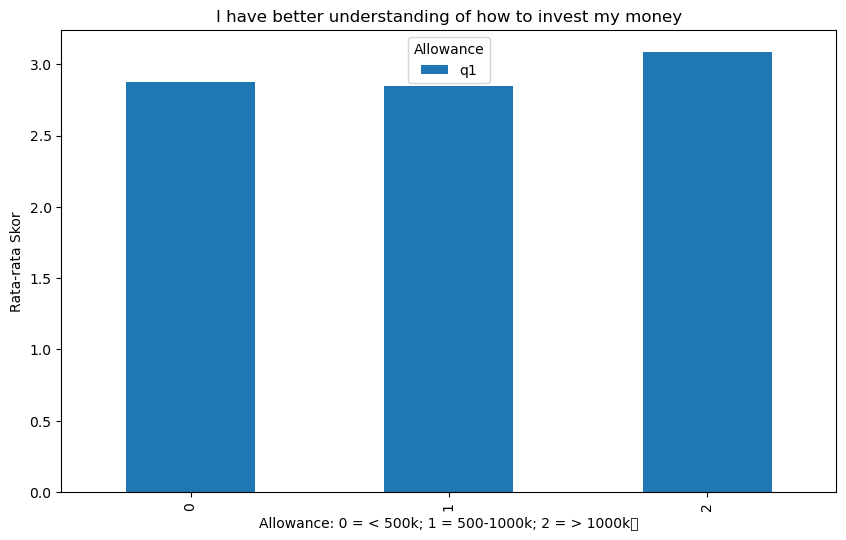

In [18]:
# Bar Plot Rata-rata Q1-Q5 berdasarkan Gender
mean_values = df.groupby('allowance').mean().loc[:, 'q1'].T
mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('I have better understanding of how to invest my money')
plt.xlabel('Allowance: 0 = < 500k; 1 = 500-1000k; 2 = > 1000k	')
plt.ylabel('Rata-rata Skor')
plt.legend(title='Allowance')
plt.show()

### PENJELASAN PLOT 7
- NOTE : Allowance: 0 = < 500k; 1 = 500-1000k; 2 = > 1000k

Plot bar menunjukkan rata-rata skor untuk pertanyaan Q1 ("I have better understanding of how to invest my money") berdasarkan tiga kategori allowance: 0 (< 500k), 1 (500-1000k), dan 2 (> 1000k). Rata-rata skor menunjukkan bahwa responden dengan allowance lebih dari 1000k (kategori 2) memiliki pemahaman yang lebih baik tentang cara menginvestasikan uang mereka, dengan skor rata-rata sekitar 3. Responden dengan allowance antara 500-1000k (kategori 1) juga memiliki skor yang sama, sementara responden dengan allowance kurang dari 500k (kategori 0) memiliki skor sedikit lebih rendah, tetapi tetap mendekati 3.

Insight dari data ini menunjukkan bahwa ada hubungan positif antara jumlah allowance dan pemahaman tentang investasi. Responden dengan allowance yang lebih tinggi mungkin memiliki akses yang lebih baik ke sumber daya atau pendidikan tentang investasi, yang meningkatkan pemahaman mereka. Sementara itu, perbedaan skor yang relatif kecil antara kategori 0 dan 1 menunjukkan bahwa meskipun allowance berpengaruh, faktor lain seperti pendidikan formal atau informal, pengalaman, dan minat pribadi juga mungkin berperan penting dalam meningkatkan pemahaman investasi. Analisis lebih lanjut dapat mengungkap lebih banyak tentang bagaimana faktor-faktor ini berinteraksi untuk mempengaruhi pemahaman investasi di antara responden.

### Plot  3(Q3 dan Gender)

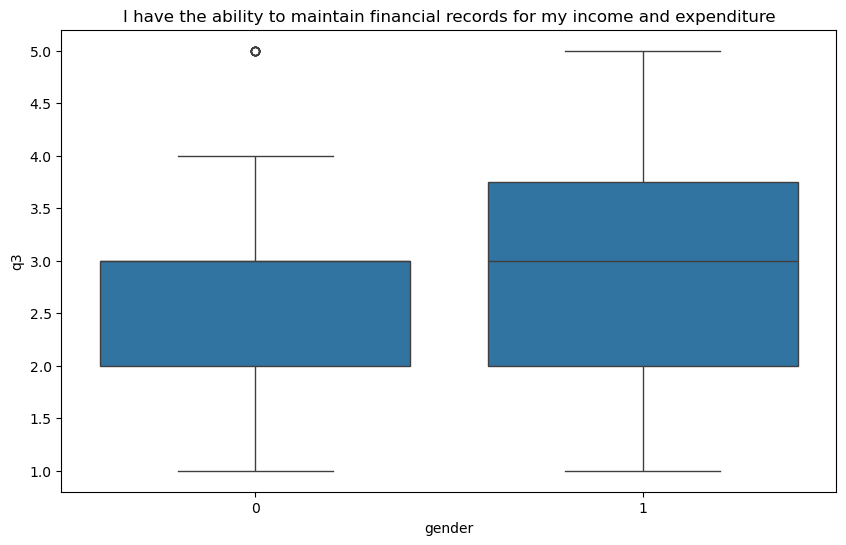

In [19]:
# Boxplot Allowance berdasarkan Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='q3')
plt.title('I have the ability to maintain financial records for my income and expenditure')
plt.xlabel('gender')
plt.ylabel('q3')
plt.show()

--- 
Instead

In [110]:
df.columns

Index(['gender', 'age', 'allowance', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7',
       'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17',
       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27',
       'q28', 'q29', 'q30', 'cluster'],
      dtype='object')

In [117]:
df_gender_based = df['gender'].value_counts().reset_index()
df_gender_based

,gender,count
0,0,185
1,1,78


In [118]:
df_age_based = df['age'].value_counts().reset_index()
df_age_based

,age,count
0,0,178
1,1,83
2,2,2


In [119]:
df_allowance_based = df['allowance'].value_counts().reset_index()
df_allowance_based

,allowance,count
0,0,155
1,1,85
2,2,23


# Feature Engineering

- Tidak ada missing value jadi tidak melakukan handling.
- Tidak ada handling outlier karena dataset categorical encoding.
- Tidak ada scalling karena tidak ada column numerical.

In [61]:
df_copy = df.copy(deep=True)

## Feature Selection

### Checking Feature Correlation

Pada tahap ini, kami akan melakukan pengecekan korelasi dengan memeriksa apakah ada multicolinarity atau tidak pada korelasinya menggunakan Variance Inflation Factor (VIF) dan library phik. Jika hasil perhitungan multicolinarity sangat tinggi atau hasil korelasi kuat, maka column akan di drop. Hal ini dikarenakan jika korelasi antara variabel independen tinggi maka akan menyebabkan koefisien regresi menjadi tidak stabil dan dapat berubah secara signifikan ketika sampel data berubah.
Dalam hal ini, kami menentukan `multicolinarity tinggi adalah diatas 30 dan korelasi kuat adalah diatas 0.9`.

In [23]:
# calculate VIF untuk setiap feature
vif = pd.DataFrame()
vif['variable'] = df_copy.columns
vif['vif'] = [variance_inflation_factor(df, i) for i in range(df_copy.shape[1])] #1 adalah jumlah column
vif

,variable,vif
0,gender,1.683430
1,age,1.682031
2,allowance,1.790041
3,q1,29.367130
4,q2,22.743347
5,q3,21.477253
6,q4,25.885680
7,q5,26.329880
8,q6,26.184193
9,q7,22.994690


In [24]:
# calculate correlation matrix with phik
phik_overview = df_copy.phik_matrix()
phik_overview

interval columns not set, guessing: ['gender', 'age', 'allowance', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30']


,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
gender,1.000000,0.000000,0.000000,0.000000,0.000000,0.105419,0.000000,0.000000,0.039515,0.000000,...,0.064116,0.101871,0.070380,0.000000,0.052701,0.103756,0.000000,0.000000,0.000000,0.084730
age,0.000000,1.000000,0.323376,0.097609,0.143545,0.197647,0.000000,0.121757,0.104689,0.077009,...,0.137378,0.000000,0.088975,0.029897,0.000000,0.000000,0.000000,0.000000,0.105920,0.057993
allowance,0.000000,0.323376,1.000000,0.000000,0.041177,0.179005,0.166173,0.057819,0.122824,0.086604,...,0.132597,0.000000,0.000000,0.101975,0.150153,0.000000,0.126558,0.031391,0.095233,0.000000
q1,0.000000,0.097609,0.000000,1.000000,0.551730,0.577924,0.466210,0.719303,0.543319,0.247068,...,0.626029,0.464745,0.115225,0.225472,0.297748,0.434461,0.327871,0.276427,0.379515,0.434058
q2,0.000000,0.143545,0.041177,0.551730,1.000000,0.812810,0.911798,0.277878,0.820062,0.674515,...,0.531401,0.773980,0.745317,0.764520,0.766947,0.702850,0.762428,0.737699,0.697806,0.398456
q3,0.105419,0.197647,0.179005,0.577924,0.812810,1.000000,0.853208,0.463073,0.848879,0.453490,...,0.582748,0.647126,0.566859,0.588007,0.681295,0.600095,0.675635,0.635244,0.597903,0.332587
q4,0.000000,0.000000,0.166173,0.466210,0.911798,0.853208,1.000000,0.474503,0.815735,0.539548,...,0.494875,0.707228,0.681039,0.678859,0.747176,0.693293,0.712240,0.682597,0.687777,0.400661
q5,0.000000,0.121757,0.057819,0.719303,0.277878,0.463073,0.474503,1.000000,0.468658,0.000000,...,0.662837,0.154081,0.237466,0.260234,0.302793,0.357942,0.341993,0.288803,0.371693,0.554168
q6,0.039515,0.104689,0.122824,0.543319,0.820062,0.848879,0.815735,0.468658,1.000000,0.404030,...,0.523652,0.674742,0.674076,0.631821,0.699205,0.644036,0.753863,0.694784,0.664539,0.200024
q7,0.000000,0.077009,0.086604,0.247068,0.674515,0.453490,0.539548,0.000000,0.404030,1.000000,...,0.337895,0.651541,0.583340,0.583071,0.578284,0.631225,0.663389,0.635817,0.583018,0.422994


Q8 37.574030
Q9 47.095343 
Q11 42.497058
Q14 30.758052
Q28 32.224748

Q2-Q4 0.914042 -> Q4
Q8-Q9 0.912521 -> Q9
Q23-Q24 0.934129 -> Q24
Q24-Q25 0.923008 -> Q24
Q28-Q29 0.925983 -> Q28

Berdasarkan pertimbangan hasil phik dan VIK, kita akan drop column berikut:
Q4
Q9
Q11
Q24
Q28

Q8 dan Q14 gak di drop karena masih acceptable

In [25]:
# drop column
df_copy.drop(['q4','q9','q11','q24','q28'],axis= 1,inplace=True)

In [26]:
# choose features
features = df_copy.columns.tolist()
features

['gender',
 'age',
 'allowance',
 'q1',
 'q2',
 'q3',
 'q5',
 'q6',
 'q7',
 'q8',
 'q10',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18',
 'q19',
 'q20',
 'q21',
 'q22',
 'q23',
 'q25',
 'q26',
 'q27',
 'q29',
 'q30']

## Dimensionality Reduction using PCA

In [27]:
# dimensionality reduction using PCA
pca = PCA()
pca.fit(df_copy)

PCA()

# Model Development

In [29]:
df_copy.shape

(263, 28)

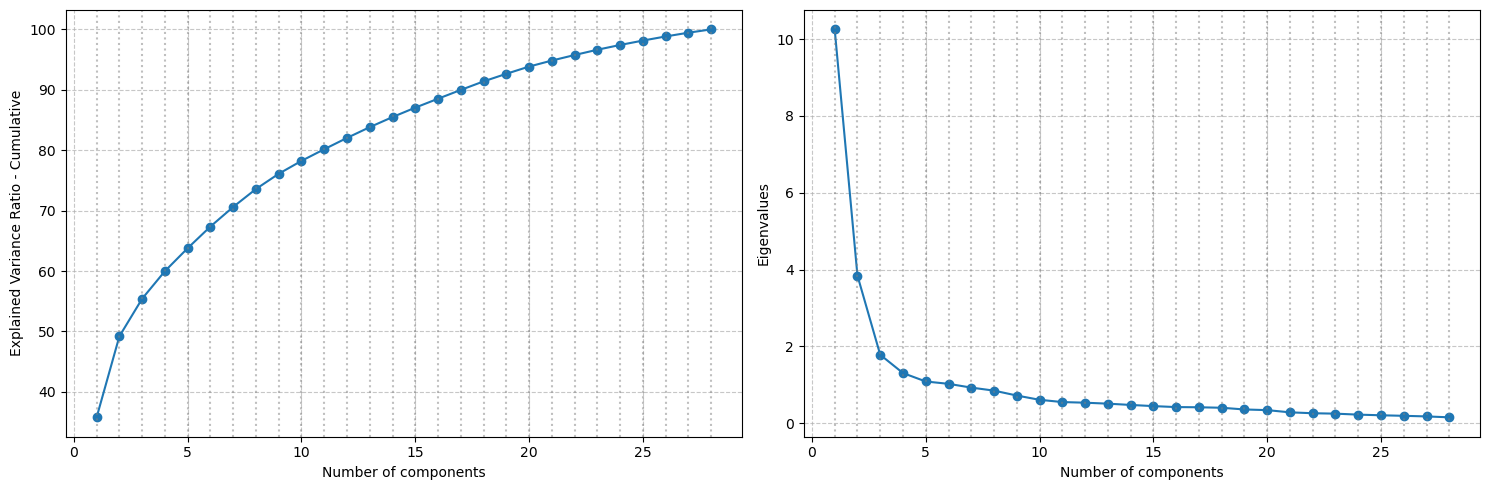

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Cumulative of Explained Variance Ratio
axes[0].plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_ * 100), marker='o')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xlabel('Number of components')
axes[0].set_ylabel('Explained Variance Ratio - Cumulative')

# Menambahkan garis bayang vertikal pada subplot pertama
for i in range(1, len(pca.explained_variance_ratio_)+1):
    axes[0].axvline(x=i, linestyle=':', color='grey', alpha=0.5)

# Plot Eigenvalues
axes[1].plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_, marker='o')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xlabel('Number of components')
axes[1].set_ylabel('Eigenvalues')

# Menambahkan garis bayang vertikal pada subplot kedua
for i in range(1, len(pca.explained_variance_ratio_)+1):
    axes[1].axvline(x=i, linestyle=':', color='grey', alpha=0.5)

# Menampilkan plot
plt.tight_layout()
plt.show()

Untuk hasil yang lebih akurat, kita akan melakukan reduksi dimensi data dengan memilih jumlah komponen yang dapat menjelaskan 90% dari total data. Alasan kita ingin mempertahankan 90% dari informasi adalah untuk mengurangi bias dalam melakukan clustering.

In [31]:
# check the number of features if we want to retain 90% of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.90) + 1 #+1 karena index dimulai dari 0
num_features

18

Setelah mengetahui number of components yang akan digunakan, kita akan melakukan reduksi dimensi berdasarkan hasil yang telah didapat sebelumnya.

In [33]:
# train the model with 28 feature
pca = PCA(n_components=num_features)
pca.fit(df_copy)

df_pca = pca.transform(df_copy)

## Clustering

Dalam hal ini, pengelompokkan responden akan menggunakan metode K-Means untuk mengelompokkan berdasarkan kecenderungan karakteristiknya menjadi kelompok-kelompok yang berbeda.

Berikut adalah visualisasi data sebelum melakukan clustering.

<Axes: >

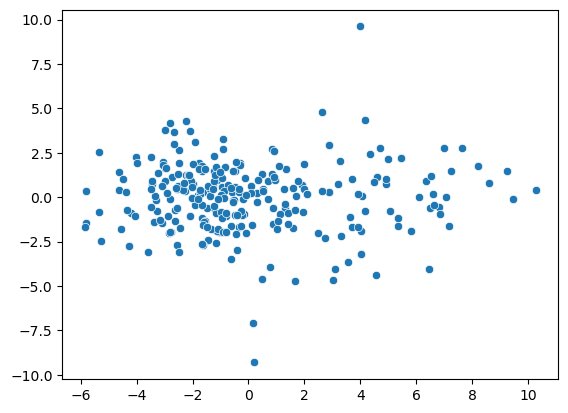

In [34]:
# check plot before clustering
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1])

### Elbow Method

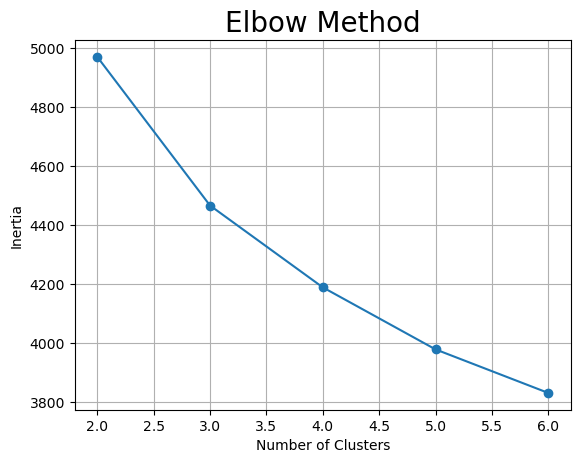

In [38]:
# find the optimal number of clusters using Elbow Method
inertia = []
random_state = 10
max_cluster = 6
for i in range(2, max_cluster+1):
    kmeans = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, max_cluster+1),inertia,marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Jumlah cluster yang tepat akan membuat ciri khas masing-masing cluster menjadi jelas dan berbeda satu sama lain. Namun, pemilihan jumlah cluster bersifat subjective sehingga kita harus melihat visualisasi dari elbow methodnya. 
Dari plot diatas, maksimal siku nya (perubahan dari vertikal jadi horizontal secara tiba-tiba) terjadi pada cluster 3 atau 4.

### Silhoutte Score and Plot

Untuk menentukan jumlah cluster yang optimal, kita akan menggunakan dua metode yang berbeda, yaitu Silhouette Score dan Silhouette Plot. Hal ini bertujuan untuk melihat perspektif yang berbeda dan membandingkan mana yang paling baik untuk menentukan jumlah cluster yang optimal.

In [39]:
# function to create silhouette plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3001306017500407
For n_clusters = 3 The average silhouette_score is : 0.14177100105153417
For n_clusters = 4 The average silhouette_score is : 0.11080789246159646
For n_clusters = 5 The average silhouette_score is : 0.10569631255383702


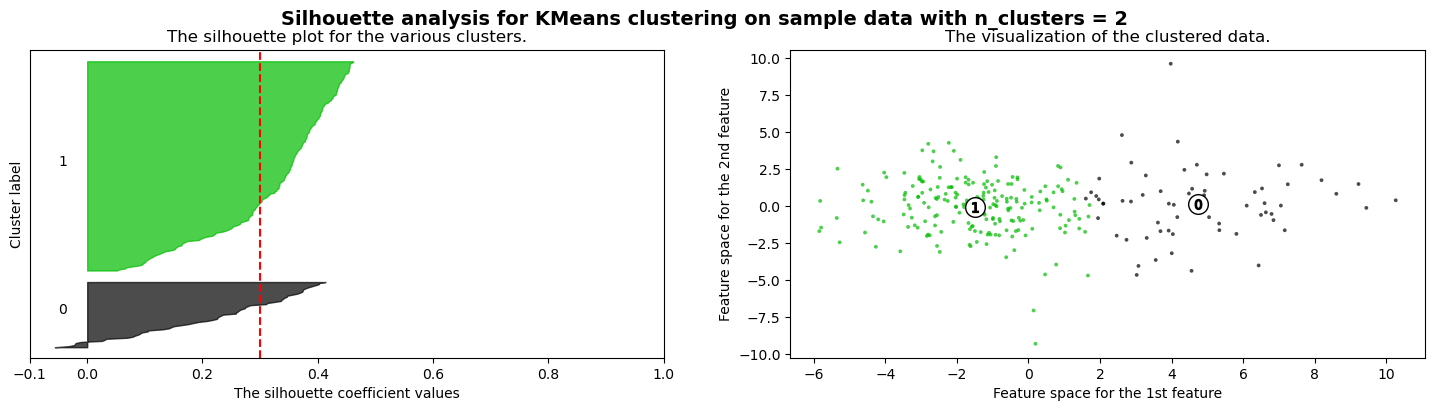

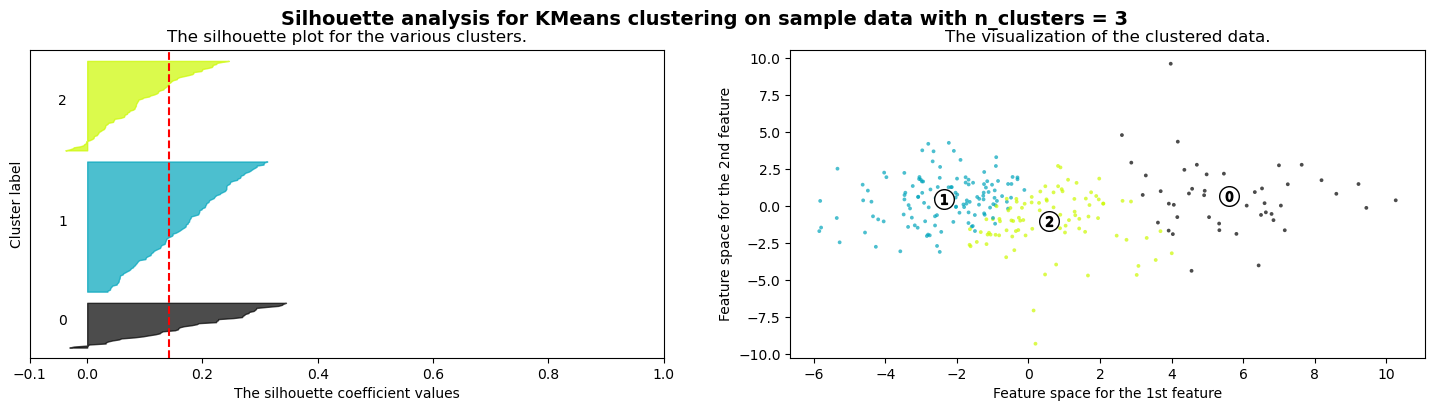

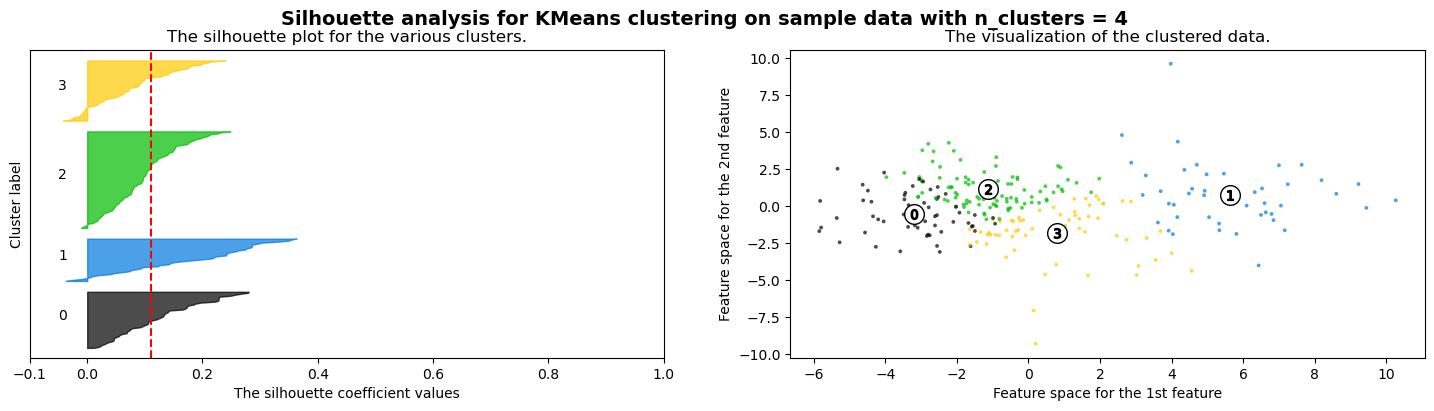

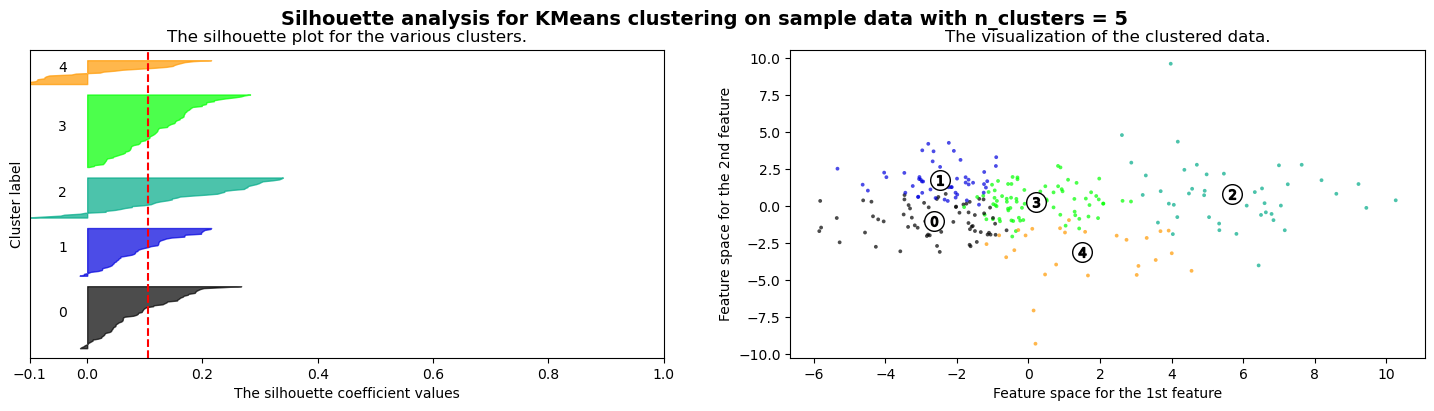

In [40]:
# display Silhouette Score and plot Silhouette Plot
plot_silhouette(range(2, max_cluster), df_pca, random_state)

Karena berdasarkan visualisasi sebelumnya elbow yang optimal adalah antara 3 atau 4, maka kita fokus membandingkan hasil silhouette plot dan score pada clustering 3 dan 4 saja.
Dari hasil silhouette plot dan silhouette score, berikut adalah insightnya:
- Hasil silhouette score pada cluster 3 memiliki hasil yang lebih besar dibandingkan cluster 4.
- Hasil silhouette plot pada cluster 4 memiliki bentuk distribusi yang lebih simetris dibandingkan cluster 3.

Hasil analisis berdasarkan insight, `jumlah cluster yang optimal adalah 3`. Meskipun hasil silhouette plot cluster 4 memiliki bentuk yang lebih simetris, tetapi dari segi panjangnya cluster 3 memiliki panjang yang lebih simetris. Selain itu, dari hasil silhouette score cluster 3 memiliki hasil score yang lebih besar.

---
Selanjutnya adalah training model dengan K-Means menggunakan jumlah cluster yang optimal, yaitu 4.

In [41]:
# train with optimal number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

In [42]:
# predict with K-Means
pred = kmeans.fit_predict(df_pca)
pred

array([2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2],
      dtype=int32)

## Evaluation Cluster

In [62]:
df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
0,0,0,0,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,3,3,3
1,1,1,0,2,2,4,3,3,3,3,...,4,2,3,2,3,4,3,2,2,3
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,0,2,1,3,2,3,3,4,...,3,2,2,1,1,2,3,3,2,3
4,0,0,1,2,2,3,2,3,2,5,...,2,1,1,2,2,1,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,...,5,4,5,5,5,3,5,5,4,3
259,0,0,0,2,2,4,4,3,3,4,...,1,2,1,1,1,1,1,1,1,1
260,0,1,2,2,3,3,3,3,4,3,...,2,2,1,1,2,1,1,1,1,4
261,0,1,2,4,3,2,3,5,4,4,...,2,3,4,4,4,3,4,3,2,1


In [63]:
# insert clustering result into dataset
df['cluster'] = pred

# show dataframe with new column
df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster
0,0,0,0,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,3,3,2
1,1,1,0,2,2,4,3,3,3,3,...,2,3,2,3,4,3,2,2,3,2
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
3,1,1,0,2,1,3,2,3,3,4,...,2,2,1,1,2,3,3,2,3,1
4,0,0,1,2,2,3,2,3,2,5,...,1,1,2,2,1,1,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,...,4,5,5,5,3,5,5,4,3,0
259,0,0,0,2,2,4,4,3,3,4,...,2,1,1,1,1,1,1,1,1,2
260,0,1,2,2,3,3,3,3,4,3,...,2,1,1,2,1,1,1,1,4,2
261,0,1,2,4,3,2,3,5,4,4,...,3,4,4,4,3,4,3,2,1,0


<Axes: >

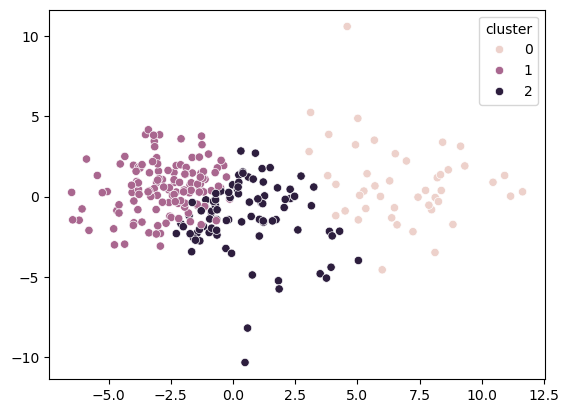

In [64]:
# cluster visualization in 2D
pca_2d = PCA(n_components=2) #to visualize in 2d
pca_2d.fit(df)

df_pca_2d = pca_2d.fit_transform(df)

sns.scatterplot(x=df_pca_2d[:,0], y=df_pca_2d[:,1], hue=df['cluster'])

### Exploratory Data Analysis After Clustering

In [65]:
df_eda_cluster = df.copy(deep=True)
df_eda_cluster

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster
0,0,0,0,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,3,3,2
1,1,1,0,2,2,4,3,3,3,3,...,2,3,2,3,4,3,2,2,3,2
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
3,1,1,0,2,1,3,2,3,3,4,...,2,2,1,1,2,3,3,2,3,1
4,0,0,1,2,2,3,2,3,2,5,...,1,1,2,2,1,1,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,...,4,5,5,5,3,5,5,4,3,0
259,0,0,0,2,2,4,4,3,3,4,...,2,1,1,1,1,1,1,1,1,2
260,0,1,2,2,3,3,3,3,4,3,...,2,1,1,2,1,1,1,1,4,2
261,0,1,2,4,3,2,3,5,4,4,...,3,4,4,4,3,4,3,2,1,0


Setelah mengelompokkan custemer, perlu dilakukan eksplorasi lebih lanjut terhadap setiap cluster yang terbentuk untuk mengidentifikasi karakteristik dari setiap clusternya.

### Objective 1: Cluster Distribution

<Axes: xlabel='cluster', ylabel='Count'>

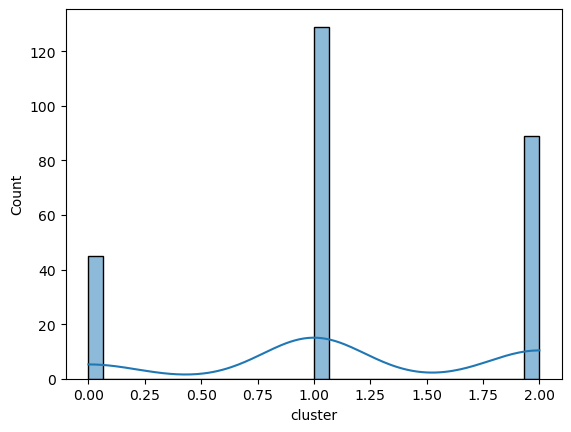

In [66]:
# data visualization
sns.histplot(df_eda_cluster['cluster'],kde=True,bins=30)

### Instead

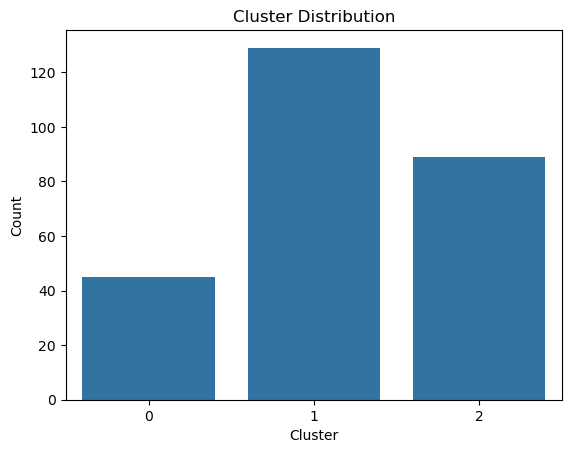

In [68]:
# Count the occurrences of each cluster
cluster_counts = df_eda_cluster['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Create the bar plot
sns.barplot(x='cluster', y='count', data=cluster_counts)

# Set the title and labels
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Show the plot
plt.show()

Berdasarkan gambar diatas, insight yang diperoleh adalah cluster 1 memiliki jumlah responden terbanyak, diikuti oleh cluster 2, dan 0. Hal ini dapat menjadi panduan untuk menentukan primary target dan strategi prioritas dalam melakukan sosialisasi recommendation system.

### Objective 2: Cluster Berdasarkan Financial Literacy

Dalam hal ini, kami menggunakan informasi pada question 5, yaitu "I have better understanding of financial instruments (e.g. Bonds, stock, T-bill, time value of money, future contract, option and ets)" untuk dapat mengetahui pemahaman responden tentang berbagai instrumen keuangan dan menentukan seberapa nyaman responden dengan investasi yang lebih kompleks atau berisiko tinggi. Semakin difersifikasi portofolionya maka dapat mengurangi dampak buruk dari investasi yang performancenya buruk.

Kami juga akan menggunakan informasi pada question 6, yaitu "I have the ability to prepare my own budget weekly and monthly" untuk dapat mengetahui kebiasaan dalam mengelola keuangan yang dapat menunjukkan komitmen terhadap perencanaan keuangan jangka panjang dan pengelolaan risiko investasi.

<Axes: xlabel='cluster,q5_cat'>

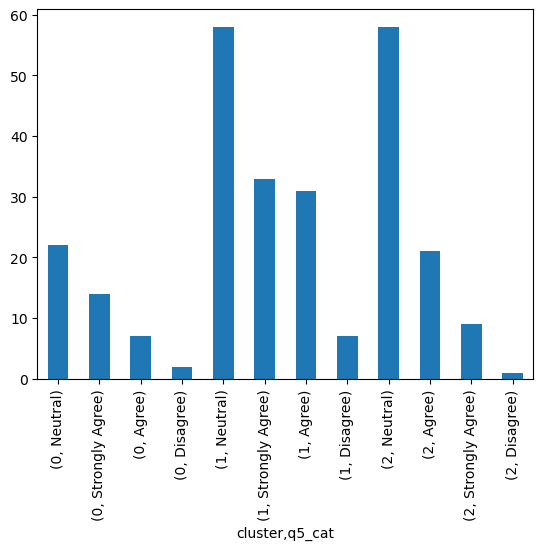

In [69]:
# create list to contain default value
lists = []

# create looping with for in
for i in df_eda_cluster.q5:
    q5 = float(i)
    if (q5 == 5 or q5 == 4):
        lists.append('Strongly Agree')
    elif (q5 == 2):
        lists.append('Agree')
    elif (q5 == 3):
        lists.append('Neutral')
    elif (q5 == 1):
        lists.append('Disagree')

# create new column
df_eda_cluster['q5_cat'] = lists

# data visualization
df_eda_cluster.groupby('cluster')['q5_cat'].value_counts().plot(kind='bar')

Berdasarkan gambar diatas, insight yang diperoleh adalah cluster 0 memiliki pemahaman yang sangat baik tentang financial literacy, dimana hal ini dapat dilihat dari pola jawaban hasil survey dimana adanya domunasi responden cluster 0 yang menjawab sangat setuju dan setuju. 
Selanjutnya, cluster 1 dan 2 juga memiliki pemahaman yang baik tentang financial literacy, dimana hal ini dapat dilihat dari pola jawaban hasil survey dengan jumlah jawaban tidak setuju yang paling sedikit.
Hal ini menandakan bahwa cluster 2 kemungkinan memiliki portofolio yang lebih terdifersifikasi daripada cluster 1 dan 2 untuk mengurangi dampak buruk investasinya.

<Axes: xlabel='cluster,q6_cat'>

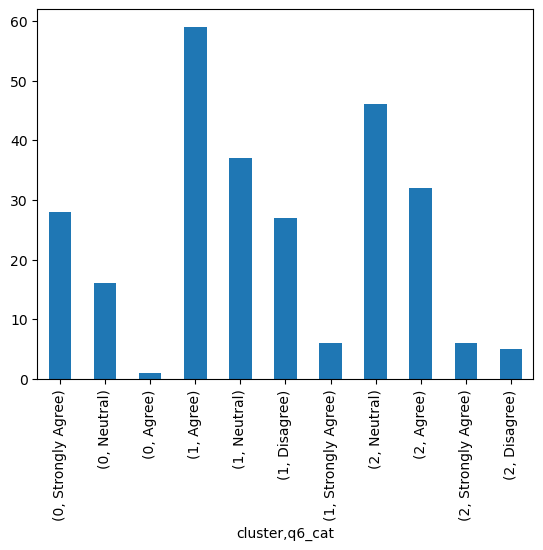

In [70]:
# create list to contain default value
lists = []

# create looping with for in
for i in df_eda_cluster.q6:
    q6 = float(i)
    if (q6 == 5 or q6 == 4):
        lists.append('Strongly Agree')
    elif (q6 == 2):
        lists.append('Agree')
    elif (q6 == 3):
        lists.append('Neutral')
    elif (q6 == 1):
        lists.append('Disagree')

# create new column
df_eda_cluster['q6_cat'] = lists

# data visualization
df_eda_cluster.groupby('cluster')['q6_cat'].value_counts().plot(kind='bar')

Berdasarkan gambar diatas, insight yang diperoleh adalah banyaknya responden pada cluster 0 yang memiliki kebiasaan dalam mengelola keuangan yang paling baik, dimana hal ini dapat dilihat dari dominasi responden cluster 0 yang menjawab sangat setuju dan tidak ada responden yang menjawab tidak setuju. Hal ini menandakan bahwa cluster 0 memiliki perencanaan keuangan yang paling baik untuk jangka panjang.

Sebaliknya, cluster 1 memiliki kebiasaan pengelolaan keuangan yang cenderung lebih buruk dibandingkan cluster 2, dimana hal ini dilihat dari sedikitnya jumlah responden cluster 1 yang menjawab sangat setuju. Hal ini dapat menandakan bahwa terdapat kemungkinan adanya keterbatasan finansial yang membuat cluster 1 hanya akan berinvestasi dengan return yang stabil dan aman saja.

### Objective 3: Cluster Berdasarkan Self Control Pengelolaan Keuangan

Dalam hal ini, kami menggunakan informasi pada question 10, yaitu "I see it, I like it, I buy it describes me" untuk dapat mengetahui behaviour responden dalam memutuskan untuk membeli sesuatu. Semakin pembelian dilakukan secara impulsif menandangnya kurangnya kontrol diri responden dalam berbelanja.

<Axes: xlabel='cluster,q10_cat'>

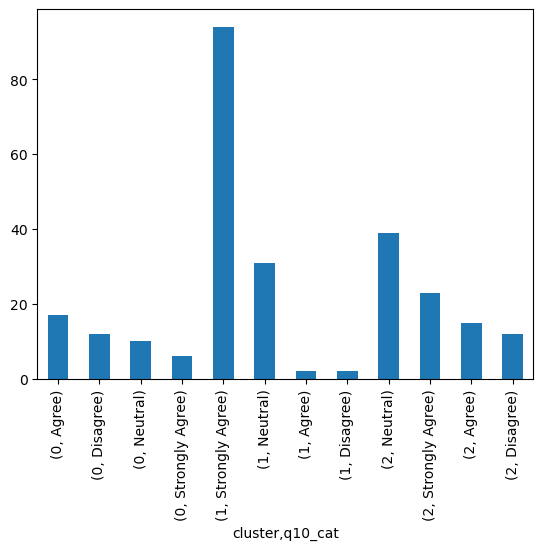

In [71]:
# create list to contain default value
lists = []

# create looping with for in
for i in df_eda_cluster.q10:
    q10 = float(i)
    if (q10 == 5 or q10 == 4):
        lists.append('Strongly Agree')
    elif (q10 == 2):
        lists.append('Agree')
    elif (q10 == 3):
        lists.append('Neutral')
    elif (q10 == 1):
        lists.append('Disagree')

# create new column
df_eda_cluster['q10_cat'] = lists

# data visualization
df_eda_cluster.groupby('cluster')['q10_cat'].value_counts().plot(kind='bar')

Berdasarkan gambar diatas, insight yang diperoleh adalah cluster 1 memiliki self control yang paling buruk dibandingkan dengan cluster lainnya, dimana hal ini dapat dilihat dari dominasi responden cluster 1 yang menjawab sangat setuju yang menunjukkan seringnya membeli barang secara impulsif.

Sebaliknya, cluster 0 memiliki self control yang paling baik, dimana hal ini dapat dilihat dari sedikitnya jumlah responden cluster 0 yang menjawab sangat setuju. Hal ini menandakan bahwa adanya kontrol diri untuk berbelanja sesuai hal yang dibutuhkan saja, bukan secara impulsif, dimana hal ini sejalan dengan karakteristik sebelumnya dimana cluster 0 memiliki perencanaan keuangan yang paling baik.

### Objective 4: Cluster Berdasarkan Peer Influence Dalam Berinvestasi

Dalam hal ini, kami menggunakan informasi pada question 17, yaitu "I always discuss financial management issue (saving) with my friends" untuk dapat mengukur seberapa sering responden berbicara tentang masalah pengelolaan keuangan dengan teman-teman mereka dalam hal kebiasaan menabung.

Kami juga akan menggunakan informasi pada question 18, yaitu "I always discuss financial management issue (investment) with my friends" untuk dapat mengukur seberapa sering responden berbicara tentang masalah pengelolaan keuangan dengan teman-teman mereka dalam hal keputusan investasi dan pengelolaan portofolio.

<Axes: xlabel='cluster,q17_cat'>

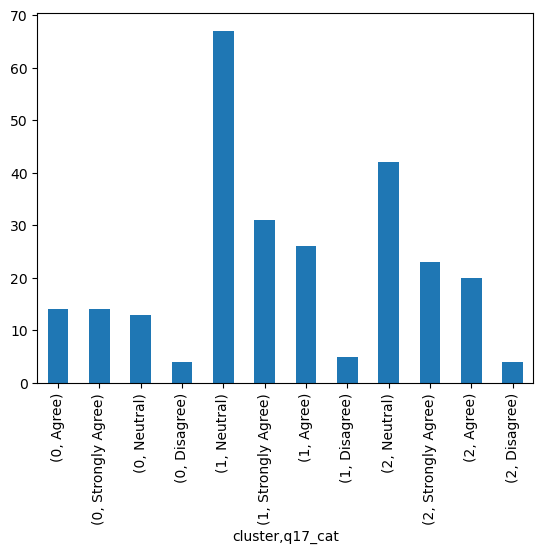

In [72]:
# create list to contain default value
lists = []

# create looping with for in
for i in df_eda_cluster.q17:
    q17 = float(i)
    if (q17 == 5 or q17 == 4):
        lists.append('Strongly Agree')
    elif (q17 == 2):
        lists.append('Agree')
    elif (q17 == 3):
        lists.append('Neutral')
    elif (q17 == 1):
        lists.append('Disagree')

# create new column
df_eda_cluster['q17_cat'] = lists

# data visualization
df_eda_cluster.groupby('cluster')['q17_cat'].value_counts().plot(kind='bar')

Berdasarkan gambar diatas, insight yang diperoleh adalah adanya pengaruh yang cukup signifikan dari teman sebaya dalam kebiasaan menabung pada cluster 0, sedangkan cluster 1 dan 2 pengaruhnya tidak terlalu signifikan. Hal ini menandakan bahwa peran teman sebaya pada cluster 0 memiliki peran yang besar dalam memotivasi kebiasaan menabung menjadi lebih baik, dimana salah satu faktor utamanya adalah karena lingkungan atau teman sebaya pada cluster 0 memiliki pemahaman yang sangat baik tentang financial literacy.

<Axes: xlabel='cluster,q18_cat'>

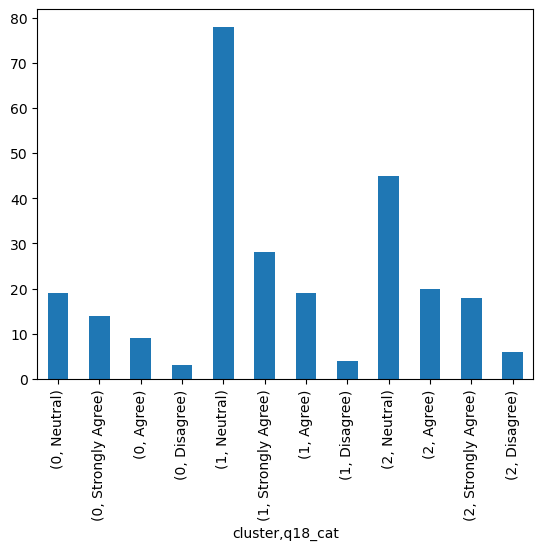

In [73]:
# create list to contain default value
lists = []

# create looping with for in
for i in df_eda_cluster.q18:
    q18 = float(i)
    if (q18 == 5 or q18 == 4):
        lists.append('Strongly Agree')
    elif (q18 == 2):
        lists.append('Agree')
    elif (q18 == 3):
        lists.append('Neutral')
    elif (q18 == 1):
        lists.append('Disagree')

# create new column
df_eda_cluster['q18_cat'] = lists

# data visualization
df_eda_cluster.groupby('cluster')['q18_cat'].value_counts().plot(kind='bar')

Berbeda dengan pengaruh dalam kebiasaan menabung, pengaruh dari teman sebaya untuk keputusan investasi dan pengelolaan portofolio pada ketiga cluster tidak terlalu signifikan. Hal ini mengindikasikan bahwa pengaruh dari lingkungan sekitar tidak cukup kuat untuk dapat mempengaruhi keputusan berinvestasi, dimana terdapat kemungkinan adanya faktor lain yang lebih mendominasi seperti kemampuan finansial, dan preferensi investasi sesuai dengan toleransi risiko masing-masing responden.

### Objective 5: Cluster Berdasaran Toleransi Risiko Fluktuasi Pasar

Dalam hal ini, kami menggunakan informasi pada question 26, yaitu "I always have money available in the event of my failed investment", untuk dapat melihat kesiapan dalam mengharapi kerugian investasi. Dalam hal ini, jika responden memiliki uang simpanan menunjukkan kemampuan untuk menghadapi risiko kerugian investasi.

<Axes: xlabel='cluster,q26_cat'>

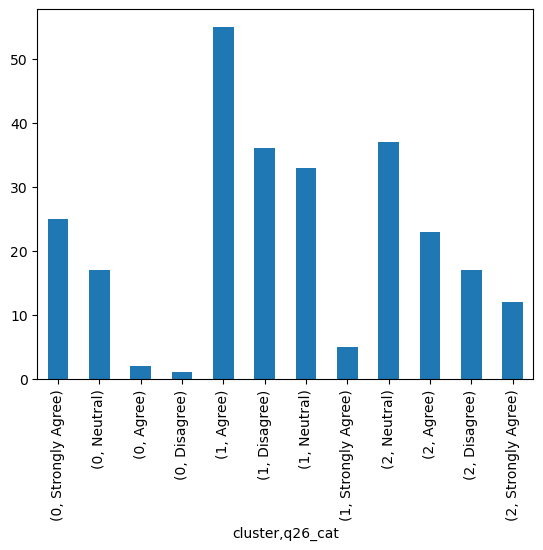

In [74]:
# create list to contain default value
lists = []

# create looping with for in
for i in df_eda_cluster.q26:
    q26 = float(i)
    if (q26 == 5 or q26 == 4):
        lists.append('Strongly Agree')
    elif (q26 == 2):
        lists.append('Agree')
    elif (q26 == 3):
        lists.append('Neutral')
    elif (q26 == 1):
        lists.append('Disagree')

# create new column
df_eda_cluster['q26_cat'] = lists

# data visualization
df_eda_cluster.groupby('cluster')['q26_cat'].value_counts().plot(kind='bar')

Berdasarkan gambar diatas, insight yang diperoleh adalah cluster 0 memiliki uang simpanan lainnya jika mengalami kerugian investasi, dimana hal ini dapat dilihat dari dominasi responden cluster 0 yang menjawab sangat setuju. Hal ini menandakan bahwa cluster 0 memiliki kemampuan yang paling tinggi dalam menghadapi risiko kerugian karena memiliki uang simpanan yang cukup jika mengalami kerugian investasi.

Sebaliknya, meskipun cluster 1 memiliki dominasi jumlah responden yang menjawab setuju, tetapi yang menjawab tidak setuju lebih dominan dibandingkan cluster 2. Hal ini menandakan bahwa cluster 1 memiliki kemampuan yang paling rendah dalam menghadapi risiko kerugian karena tidak memiliki uang simpanan jika mengalami kerugian investasi.

### Conclusion

Dari hasil evaluasi K-Means, jumlah cluster yang optimal adalah 3. Berikut adalah ciri-ciri pada masing-masing cluster berdasarkan hasil exploratory data analysis yang telah dilakukan:
- Cluster 0:
    - Memiliki pemahaman yang sangat baik tentang financial literacy.
    - Memiliki kebiasaan dalam mengelola keuangan yang paling baik.
    - Memiliki self control yang paling baik karena berbelanja sesuai kebutuhan saja.
    - Adanya pengaruh yang cukup signifikan dari lingkungan atau teman sebaya dalam kebiasaan menabung.
    - Tidak adanya pengaruh yang signifikan dari lingkungan atau teman sebaya untuk keputusan investasi dan pengelolaan portofolio.
    - Memiliki kemampuan yang paling tinggi dalam menghadapi risiko kerugian karena adanya dana cadangan yang besar jika mengalami kerugian investasi.
- Cluster 1:
    - Memiliki pemahaman yang baik tentang financial literacy.
    - Memiliki kebiasaan dalam mengelola keuangan yang cenderung buruk.
    - Memiliki self control yang paling buruk karena seringnya berbelanja secara impulsif.
    - Tidak adanya pengaruh yang signifikan dari lingkungan atau teman sebaya dalam kebiasaan menabung.
    - Tidak adanya pengaruh yang signifikan dari lingkungan atau teman sebaya untuk keputusan investasi dan pengelolaan portofolio.
    - Memiliki kemampuan yang paling rendah dalam menghadapi risiko kerugian karena tidak memiliki dana cadangan.
- Cluster 2:
    - Memiliki pemahaman yang baik tentang financial literacy.
    - Memiliki kebiasaan dalam mengelola keuangan yang baik.
    - Memiliki self control yang cukup baik, meskipun sesekali berbelanja secara impulsif.
    - Tidak adanya pengaruh yang signifikan dari lingkungan atau teman sebaya dalam kebiasaan menabung.
    - Tidak adanya pengaruh yang signifikan dari lingkungan atau teman sebaya untuk keputusan investasi dan pengelolaan portofolio.
    - Memiliki kemampuan yang cukup dalam menghadapi risiko kerugian karena adanya dana cadangan jika mengalami kerugian investasi.

### Recommendation

Berdasarkan analisis di atas, berikut rekomendasi produk investasi yang relevan berdasarkan ciri-ciri dari masing-masing cluster:
- `Cluster 0 adalah investor agressive` yang memiliki risiko investasi yang tinggi dengan tujuan investasi jangka panjang, dimana karakteristik dari cluster ini adalah nyaman dengan fluktuasi nilai investasi dan dapat menahan potensi kerugian dengan harapan mendapatkan return yang lebih tinggi. Oleh karena itu, rekomendasi produk investasi yang sesuai adalah `portofolio yang didominasi oleh instrumen yang cukup berisiko seperti saham`.
- `Cluster 1 adalah investor conservative` yang memiliki risiko investasi yang rendah dengan tujuan investasi jangka pendek atau dalam waktu yang terbatas, dimana karakteristik dari cluster ini adalah memiliki dana terbatas dan tidak nyaman dengan fluktuasi investasi sehingga lebih memilih investasi dengan pengembalian yang lebih stabil dan aman. Oleh karena itu, rekomendasi produk investasi yang sesuai adalah `tabungan di deposito bank, obligasi pemerintah, dan reksadana pasar uang`.
- `Cluster 2 adalah investor moderate` yang memiliki risiko investasi yang sedang dengan tujuan investasi jangka menengah hingga panjang, dimana karakteristik dari cluster ini adalah mengharapkan return yang lebih tinggi daripada investasi konservatif, tetapi masih menginginkan stabilitas. Oleh karena itu, rekomendasi produk investasi yang sesuai adalah `portofolio campuran antara saham, obligasi, deposito, atau aset lainnya`.

Selanjutnya, dikarenakan berdasarkan hasil survey jumlah responden pada cluster 1 paling banyak, maka primary target dalam melakukan sosialisasi recommendation system adalah investor conservative, diikuti oleh investor moderate dan agressive.

In [ ]:
# rename value on column 'cluster'
df['cluster'] = df['cluster'].replace({0:'Agressive',1:'Conservative',2:'Moderate'})

In [76]:
df.to_csv('survey_financial_ref_dataset_clustered.csv',index=False)

---
Instead

In [77]:
df.columns

Index(['gender', 'age', 'allowance', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7',
       'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17',
       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27',
       'q28', 'q29', 'q30', 'cluster'],
      dtype='object')

In [78]:
cluster_1 = df.loc[df['cluster'] == 0]
cluster_2 = df.loc[df['cluster'] == 1]
cluster_3 = df.loc[df['cluster'] == 2]

In [86]:
cluster_1

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster
5,0,0,1,3,4,4,4,2,4,2,...,4,4,5,3,3,4,3,3,1,0
19,0,1,2,3,5,5,5,3,4,3,...,3,5,5,5,5,5,5,5,1,0
24,1,0,0,3,4,3,4,3,4,2,...,4,5,4,4,4,4,4,4,3,0
28,1,0,0,3,3,3,3,3,3,2,...,4,4,4,4,4,4,4,4,2,0
33,1,1,0,3,4,3,4,3,3,3,...,2,5,4,4,3,3,3,3,3,0
36,0,0,0,2,3,3,3,2,3,2,...,3,4,4,4,2,3,3,3,1,0
50,0,1,0,2,3,1,3,2,4,2,...,4,5,5,5,3,4,5,5,2,0
60,0,0,0,3,4,4,4,3,3,1,...,4,4,5,5,3,4,4,4,3,0
78,0,0,1,1,4,4,4,1,3,2,...,4,5,5,5,5,4,4,3,1,0
90,0,1,1,4,4,4,4,4,4,3,...,4,4,4,4,4,4,4,4,4,0


In [84]:
cluster_2

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster
3,1,1,0,2,1,3,2,3,3,4,...,2,2,1,1,2,3,3,2,3,1
4,0,0,1,2,2,3,2,3,2,5,...,1,1,2,2,1,1,2,1,3,1
7,1,0,1,2,1,3,2,3,2,3,...,1,2,2,3,3,2,2,1,2,1
9,0,0,0,3,2,1,3,3,3,5,...,2,3,1,1,1,2,2,2,3,1
12,0,1,1,3,2,2,2,3,2,4,...,2,2,3,3,2,3,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0,0,0,3,2,2,3,3,2,3,...,3,1,1,2,3,2,2,2,4,1
249,0,0,1,3,1,1,1,3,1,5,...,2,1,1,1,3,2,1,1,4,1
250,1,0,0,3,3,2,2,3,2,4,...,1,1,1,2,2,2,2,2,4,1
252,0,1,1,3,1,2,2,2,2,4,...,1,2,1,1,1,2,1,1,4,1


In [85]:
cluster_3

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster
0,0,0,0,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,3,3,2
1,1,1,0,2,2,4,3,3,3,3,...,2,3,2,3,4,3,2,2,3,2
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
6,0,0,1,2,3,1,1,3,1,1,...,3,2,2,1,2,2,2,3,4,2
8,1,1,0,3,3,4,3,3,3,2,...,4,3,3,2,4,3,5,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1,0,0,3,2,2,2,2,2,3,...,2,1,3,3,1,2,3,2,3,2
257,0,0,0,3,4,5,4,3,3,5,...,2,2,4,4,2,2,3,3,1,2
259,0,0,0,2,2,4,4,3,3,4,...,2,1,1,1,1,1,1,1,1,2
260,0,1,2,2,3,3,3,3,4,3,...,2,1,1,2,1,1,1,1,4,2


In [87]:
cluster_summary = df.groupby('cluster').mean()
cluster_summary

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.288889,0.444444,0.711111,3.288889,4.022222,3.666667,3.911111,3.133333,3.777778,2.355556,...,3.444444,3.888889,4.444444,4.511111,4.266667,3.755556,4.044444,4.022222,3.977778,2.622222
1,0.255814,0.333333,0.503876,2.813953,1.798450,2.294574,2.201550,2.922481,2.178295,4.224806,...,2.782946,1.968992,1.550388,1.488372,1.767442,2.062016,1.829457,1.930233,1.976744,3.589147
2,0.359551,0.269663,0.382022,2.786517,2.460674,2.741573,2.606742,2.853933,2.606742,3.269663,...,2.685393,2.606742,2.056180,2.067416,2.235955,2.505618,2.269663,2.359551,2.393258,3.280899


In [88]:
cluster_count = df['cluster'].value_counts()
print(cluster_count)

cluster
1    129
2     89
0     45
Name: count, dtype: int64


In [107]:
for cluster in [0, 1, 2]:
    print(f"Cluster {cluster} Analysis:")
    print(f"Number of respondents: {cluster_count[cluster]}")
    cluster_means = cluster_summary.loc[cluster]
    print("\nFinancial Literacy:")
    for q in range(1, 7):
        print(f"q{q}: {cluster_means[f'q{q}']:.2f}")
    
    print("\nSelf-Control:")
    for q in range(7, 16):
        print(f"q{q}: {cluster_means[f'q{q}']:.2f}")
    
    print("\nPeer-Influence:")
    for q in range(16, 22):
        print(f"q{q}: {cluster_means[f'q{q}']:.2f}")
    
    print("\nInvestment Behavior:")
    for q in range(22, 31):
        print(f"q{q}: {cluster_means[f'q{q}']:.2f}")
    print("\n")

Cluster 0 Analysis:
Number of respondents: 45

Financial Literacy:
q1: 3.29
q2: 4.02
q3: 3.67
q4: 3.91
q5: 3.13
q6: 3.78

Self-Control:
q7: 2.36
q8: 2.27
q9: 2.13
q10: 2.27
q11: 2.29
q12: 2.09
q13: 2.62
q14: 2.33
q15: 3.09

Peer-Influence:
q16: 3.60
q17: 2.91
q18: 3.04
q19: 3.18
q20: 2.91
q21: 3.44

Investment Behavior:
q22: 3.89
q23: 4.44
q24: 4.51
q25: 4.27
q26: 3.76
q27: 4.04
q28: 4.02
q29: 3.98
q30: 2.62


Cluster 1 Analysis:
Number of respondents: 129

Financial Literacy:
q1: 2.81
q2: 1.80
q3: 2.29
q4: 2.20
q5: 2.92
q6: 2.18

Self-Control:
q7: 4.22
q8: 4.47
q9: 4.71
q10: 4.09
q11: 4.06
q12: 4.24
q13: 3.87
q14: 4.04
q15: 3.42

Peer-Influence:
q16: 2.40
q17: 2.99
q18: 3.06
q19: 2.60
q20: 3.36
q21: 2.78

Investment Behavior:
q22: 1.97
q23: 1.55
q24: 1.49
q25: 1.77
q26: 2.06
q27: 1.83
q28: 1.93
q29: 1.98
q30: 3.59


Cluster 2 Analysis:
Number of respondents: 89

Financial Literacy:
q1: 2.79
q2: 2.46
q3: 2.74
q4: 2.61
q5: 2.85
q6: 2.61

Self-Control:
q7: 3.27
q8: 3.42
q9: 3.61
q10: 2.8

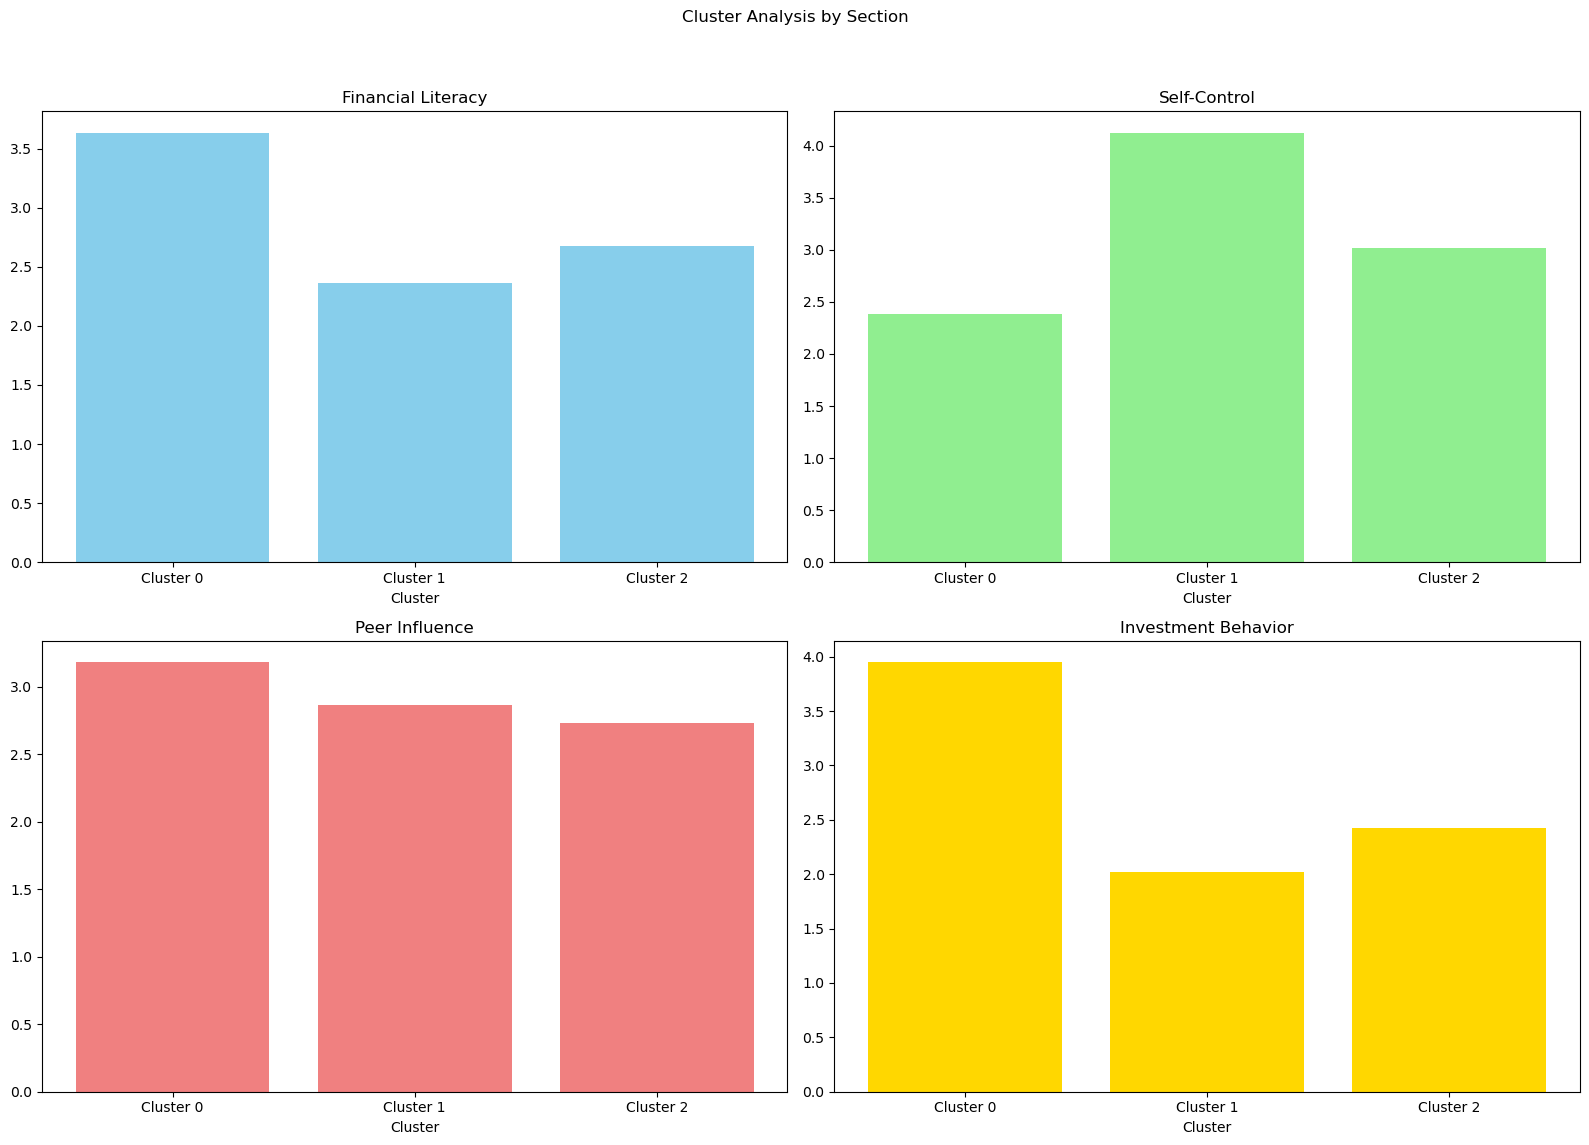

In [106]:
# Define the data
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
financial_literacy = [np.mean([3.29, 4.02, 3.67, 3.91, 3.13, 3.78]),
                      np.mean([2.81, 1.80, 2.29, 2.20, 2.92, 2.18]),
                      np.mean([2.79, 2.46, 2.74, 2.61, 2.85, 2.61])]

self_control = [np.mean([2.36, 2.27, 2.13, 2.27, 2.29, 2.09, 2.62, 2.33, 3.09]),
                np.mean([4.22, 4.47, 4.71, 4.09, 4.06, 4.24, 3.87, 4.04, 3.42]),
                np.mean([3.27, 3.42, 3.61, 2.89, 3.09, 2.99, 2.71, 2.79, 2.38])]

peer_influence = [np.mean([3.60, 2.91, 3.04, 3.18, 2.91, 3.44]),
                  np.mean([2.40, 2.99, 3.06, 2.60, 3.36, 2.78]),
                  np.mean([2.57, 2.94, 2.88, 2.55, 2.74, 2.69])]

investment_behavior = [np.mean([3.89, 4.44, 4.51, 4.27, 3.76, 4.04, 4.02, 3.98, 2.62]),
                       np.mean([1.97, 1.55, 1.49, 1.77, 2.06, 1.83, 1.93, 1.98, 3.59]),
                       np.mean([2.61, 2.06, 2.07, 2.24, 2.51, 2.27, 2.36, 2.39, 3.28])]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Cluster Analysis by Section')

# Plot Financial Literacy
axs[0, 0].bar(clusters, financial_literacy, color='skyblue')
axs[0, 0].set_title('Financial Literacy')
axs[0, 0].set_xlabel('Cluster')

# Plot Self-Control
axs[0, 1].bar(clusters, self_control, color='lightgreen')
axs[0, 1].set_title('Self-Control')
axs[0, 1].set_xlabel('Cluster')

# Plot Peer Influence
axs[1, 0].bar(clusters, peer_influence, color='lightcoral')
axs[1, 0].set_title('Peer Influence')
axs[1, 0].set_xlabel('Cluster')

# Plot Investment Behavior
axs[1, 1].bar(clusters, investment_behavior, color='gold')
axs[1, 1].set_title('Investment Behavior')
axs[1, 1].set_xlabel('Cluster')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**1. Cluster 0: Aggressive Investor**

- Financial Literacy: High (3.29 - 4.02) - Indicates a strong level of financial knowledge.

- Self-Control: Low (2.09 - 3.09) - Suggests poor self-control and a tendency towards impulsive spending.

- Peer Influence: Moderate (2.91 - 3.60) - Indicates some level of influence from peers.

- Investment Behavior: High (2.62 - 4.51) - Shows very proactive and active investment behavior.

*Interpretation: This cluster consists of individuals who are highly knowledgeable about finance and very active in investments but tend to have low self-control, leading to potentially impulsive investment decisions.*

**2. Cluster 1: Conservative Investor**

- Financial Literacy: Low (1.80 - 2.92) - Indicates limited financial knowledge.

- Self-Control: High (3.42 - 4.71) - Shows strong self-control and cautious spending habits.

- Peer Influence: Low (2.40 - 3.36) - Minimal influence from peers.

- Investment Behavior: Low (1.49 - 3.59) - Indicates low and less active investment behavior.

*Interpretation: This cluster consists of individuals with good self-control and cautious spending habits but with limited financial knowledge and less active in investment activities.*

**3. Cluster 2: Moderate Investor**

- Financial Literacy: Moderate (2.46 - 2.85) - Indicates a moderate level of financial knowledge.

- Self-Control: Moderate (2.38 - 3.61) - Shows decent self-control, but not as strong as in Cluster 1.

- Peer Influence: Moderate (2.57 - 2.94) - Indicates moderate peer influence.

- Investment Behavior: Moderate (2.06 - 3.28) - Shows a balanced level of investment behavior.

*Interpretation: This cluster consists of individuals with a balanced level of financial knowledge, self-control, peer influence, and investment behavior. They are neither highly active in investments nor lack knowledge, showing a moderate approach overall.*

**Summary:**

- Aggressive Investor: Has high financial knowledge and investment activity but low self-control.

- Conservative Investor: Has strong self-control and cautious investment behavior but limited financial knowledge.

- Moderate Investor: Displays a balanced approach in financial knowledge, self-control, peer influence, and investment behavior.

In [121]:
# rename value on column 'cluster'
df['cluster'] = df['cluster'].replace({0:'Agressive',1:'Conservative',2:'Moderate'})

In [122]:
df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster
0,0,0,0,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,3,3,Moderate
1,1,1,0,2,2,4,3,3,3,3,...,2,3,2,3,4,3,2,2,3,Moderate
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Moderate
3,1,1,0,2,1,3,2,3,3,4,...,2,2,1,1,2,3,3,2,3,Conservative
4,0,0,1,2,2,3,2,3,2,5,...,1,1,2,2,1,1,2,1,3,Conservative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,...,4,5,5,5,3,5,5,4,3,Agressive
259,0,0,0,2,2,4,4,3,3,4,...,2,1,1,1,1,1,1,1,1,Moderate
260,0,1,2,2,3,3,3,3,4,3,...,2,1,1,2,1,1,1,1,4,Moderate
261,0,1,2,4,3,2,3,5,4,4,...,3,4,4,4,3,4,3,2,1,Agressive


In [123]:
df.to_csv('survey_financial_ref_dataset_clustered.csv',index=False)

In [124]:
df.columns

Index(['gender', 'age', 'allowance', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7',
       'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17',
       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27',
       'q28', 'q29', 'q30', 'cluster'],
      dtype='object')

In [139]:
df['rec'] = df['cluster'].apply(lambda x: ['stocks', 'equity mutual funds', 'balanced mutual fund'] if x == 'Agressive' else (['deposits', 'bonds', 'fixed income mutual funds'] if x == 'Conservative' else ['balanced mutual funds', 'money market mutual funds', 'bonds']))
df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q24,q25,q26,q27,q28,q29,q30,cluster,rec,investment_behavior
0,0,0,0,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,Moderate,"[balanced mutual funds, money market mutual fu...",neutral about regularly puts money aside for t...
1,1,1,0,2,2,4,3,3,3,3,...,2,3,4,3,2,2,3,Moderate,"[balanced mutual funds, money market mutual fu...",regularly puts money aside for the future. ne...
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,Moderate,"[balanced mutual funds, money market mutual fu...",does not regularly puts money aside for the fu...
3,1,1,0,2,1,3,2,3,3,4,...,1,1,2,3,3,2,3,Conservative,"[deposits, bonds, fixed income mutual funds]",regularly puts money aside for the future. c...
4,0,0,1,2,2,3,2,3,2,5,...,2,2,1,1,2,1,3,Conservative,"[deposits, bonds, fixed income mutual funds]",does not regularly puts money aside for the fu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,...,5,5,3,5,5,4,3,Agressive,"[stocks, equity mutual funds, balanced mutual ...",strongly regularly puts money aside for the fu...
259,0,0,0,2,2,4,4,3,3,4,...,1,1,1,1,1,1,1,Moderate,"[balanced mutual funds, money market mutual fu...",regularly puts money aside for the future. do...
260,0,1,2,2,3,3,3,3,4,3,...,1,2,1,1,1,1,4,Moderate,"[balanced mutual funds, money market mutual fu...",regularly puts money aside for the future. do...
261,0,1,2,4,3,2,3,5,4,4,...,4,4,3,4,3,2,1,Agressive,"[stocks, equity mutual funds, balanced mutual ...",neutral about regularly puts money aside for t...


In [141]:
# Define the mapping for the responses
response_mapping = {
    1: "does not",
    2: "",
    3: "neutral about",
    4: "strongly",
    5: "very strongly"
}

# Define the questions and corresponding summaries
questions_summaries = {
    'q22': "{} regularly puts money aside for the future.",
    'q23': "{} compares prices before making purchases for investment.",
    'q24': "{} considers stock prices before selling.",
    'q25': "{} understands fundamental analysis.",
    'q26': "{} always has money available in case of a failed investment.",
    'q27': "{} plans to manage expenses in order to invest.",
    'q28': "{} saves money in order to invest.",
    'q29': "{} invests to achieve certain goals.",
    'q30': "{} has investment accounts in money and capital markets."
}

# Function to generate descriptive summary for investment behavior
def generate_investment_behavior_summary(data):
    behavior_summary = []
    for question, summary in questions_summaries.items():
        response = data[question]
        behavior_summary.append(summary.format(response_mapping[response]))
    return " ".join(behavior_summary)

In [140]:
df['investment_behavior'] = df.apply(generate_investment_behavior_summary, axis=1)

In [142]:
df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q24,q25,q26,q27,q28,q29,q30,cluster,rec,investment_behavior
0,0,0,0,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,Moderate,"[balanced mutual funds, money market mutual fu...",neutral about regularly puts money aside for t...
1,1,1,0,2,2,4,3,3,3,3,...,2,3,4,3,2,2,3,Moderate,"[balanced mutual funds, money market mutual fu...",regularly puts money aside for the future. ne...
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,Moderate,"[balanced mutual funds, money market mutual fu...",does not regularly puts money aside for the fu...
3,1,1,0,2,1,3,2,3,3,4,...,1,1,2,3,3,2,3,Conservative,"[deposits, bonds, fixed income mutual funds]",regularly puts money aside for the future. c...
4,0,0,1,2,2,3,2,3,2,5,...,2,2,1,1,2,1,3,Conservative,"[deposits, bonds, fixed income mutual funds]",does not regularly puts money aside for the fu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,...,5,5,3,5,5,4,3,Agressive,"[stocks, equity mutual funds, balanced mutual ...",strongly regularly puts money aside for the fu...
259,0,0,0,2,2,4,4,3,3,4,...,1,1,1,1,1,1,1,Moderate,"[balanced mutual funds, money market mutual fu...",regularly puts money aside for the future. do...
260,0,1,2,2,3,3,3,3,4,3,...,1,2,1,1,1,1,4,Moderate,"[balanced mutual funds, money market mutual fu...",regularly puts money aside for the future. do...
261,0,1,2,4,3,2,3,5,4,4,...,4,4,3,4,3,2,1,Agressive,"[stocks, equity mutual funds, balanced mutual ...",neutral about regularly puts money aside for t...


In [143]:
new_df = df[['cluster', 'rec', 'investment_behavior']].reset_index()
new_df

,index,cluster,rec,investment_behavior
0,0,Moderate,"[balanced mutual funds, money market mutual fu...",neutral about regularly puts money aside for t...
1,1,Moderate,"[balanced mutual funds, money market mutual fu...",regularly puts money aside for the future. ne...
2,2,Moderate,"[balanced mutual funds, money market mutual fu...",does not regularly puts money aside for the fu...
3,3,Conservative,"[deposits, bonds, fixed income mutual funds]",regularly puts money aside for the future. c...
4,4,Conservative,"[deposits, bonds, fixed income mutual funds]",does not regularly puts money aside for the fu...
...,...,...,...,...
258,258,Agressive,"[stocks, equity mutual funds, balanced mutual ...",strongly regularly puts money aside for the fu...
259,259,Moderate,"[balanced mutual funds, money market mutual fu...",regularly puts money aside for the future. do...
260,260,Moderate,"[balanced mutual funds, money market mutual fu...",regularly puts money aside for the future. do...
261,261,Agressive,"[stocks, equity mutual funds, balanced mutual ...",neutral about regularly puts money aside for t...


# Model Saving

# Conclusion